#  Team Members:
   1. Judy Koech
   2. Elizabeth Masai
   3. Phinidy George

# 1.0 BUSINESS UNDERSTANDING

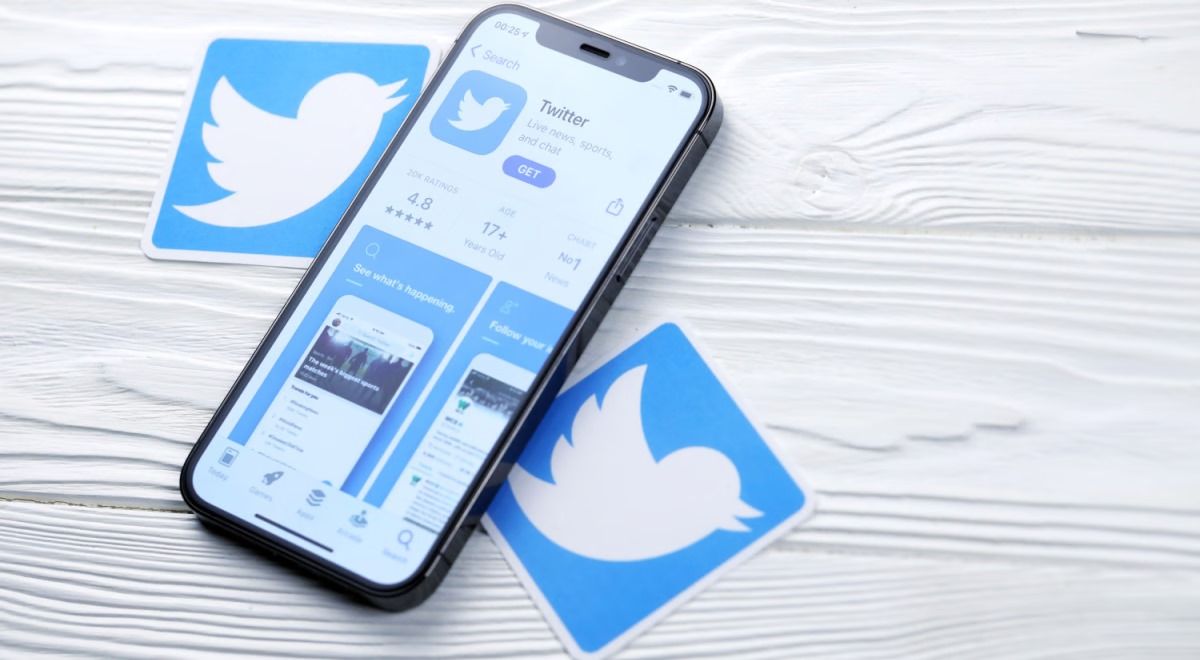

## 1.1. Overview/Background

The landscape of traditional advertising has changed dramatically, with many companies now employing highly targeted strategies. By understanding customer demographics, businesses can communicate more directly and effectively. Social media platforms like Twitter and Facebook offer a direct channel for consumers to share their opinions about brands, products, and services. While this real-time feedback is invaluable, managing the sheer volume of messages can be challenging.

## 1.2. Business Problem

Consumers frequently use social media to share their thoughts, presenting companies with the challenge of extracting actionable insights from the overwhelming amount of data. For example, during SXSW 2011, Apple and Google introduced numerous new products and services, resulting in a flood of tweets. Sifting through thousands of unlabeled tweets to gain meaningful insights is a significant challenge for companies like Apple.

## 1.3.  Project Aim and Scope

The project aims to assist companies such as Apple and Google by developing a predictive classification model that can analyze tweets. This model will categorize the sentiment of tweets as "Positive" or "Not positive" (including neutral or sentiment-lacking tweets). By doing so, companies can better organize and utilize the information embedded in the tweets they receive during events like SXSW or in their regular social media interactions.
## 1.4. Stakeholders

The primary stakeholders in this project are companies like Apple and Google, which will benefit from an enhanced ability to understand consumer sentiment. Secondary stakeholders include marketing teams, product managers, and customer service departments that can leverage these insights for better decision-making and strategy formulation.

## 1.5. Conclusion

This classification model offers numerous benefits, particularly by identifying "Positive" tweets about Apple and Google products:

1. Gauging public opinion
2. Obtaining direct consumer feedback
3. Retraining the model on custom datasets for specific products or regions
4. Understanding target demographics
    - Identifying individuals who show positive interest
    - Tailoring advertising strategies more effectively
    - Facilitating advertising within social media circles of existing fans, enhancing outreach and engagement

The project has the potential to transform how companies interact with and respond to consumer feedback on social media, providing valuable insights and fostering better consumer relationships.


# 2.0 DATA UNDERSTANDING


To build an effective NLP model for analyzing Twitter sentiment about Apple and Google products, we need to thoroughly understand the dataset and its properties. The dataset in question comes from CrowdFlower via data.world and contains over 9,000 tweets that have been rated by human raters as positive, negative, or neither. Below is a detailed breakdown of the data understanding process:


## 2.1 Dataset Overview

The dataset consists of 9,093 tweets related to technology products and brands, with a focus on Apple and Google products. The data was collected during and after the 2011 South by Southwest (SXSW) Conference. Each tweet has been pre-labeled by human raters for sentiment analysis and product and brand identification.


## 2.2 Source of Data and Suitability

**Source**

The dataset used in this project originates from CrowdFlower, now known as Figure Eight, and was subsequently made available on
[data.world](https://data.world/crowdflower/brands-and-product-emotions) .Kent Cavender-Bares contributed this valuable resource on August 30, 2013, sharing it with the data science community.

The data is contained in a CSV file named "judge-1377884607_tweet_product_company.csv", which serves as the primary source for our analysis. This file contains a wealth of information about consumer sentiments towards technology products, particularly focusing on tweets related to Apple and Google during the 2011 South by Southwest (SXSW) Conference.

**Suitability**

- The dataset is highly relevant for the project as it specifically contains tweets about Apple and Google products, aligning perfectly with the project's aim.
- The manual sentiment ratings (positive, negative, or neither) provide a robust foundation for training a sentiment analysis model.
- Raters judged if the tweet's text expressed a positive, negative, or no emotion towards a brand . When an emotion was expressed, the rater identified the brand  that was the target of that emotion.








## 2.3 Data Size and  Structures

**Data Size**

 The dataset comprises over 9,000 tweets, which is a substantial amount for training an NLP model. This size is generally sufficient to capture a wide range of sentiment expressions and variations in language.


**Data Structures**

The resulting data file contains three columns per row:

a) tweet_text: The actual content of the tweet

b) emotion_in_tweet_is_directed_at: The product or brand the emotion is directed at (if identifiable)

c) is_there_an_emotion_directed_at_a_brand_or_product: The sentiment of the tweet (Positive, Negative, or No emotion)

## 2.4. Feature Inclusion and Relevance

### Features:
- **Tweet Text:** The primary feature for sentiment analysis. The content of the tweet will be tokenized and transformed into numerical representations (e.g., TF-IDF, word embeddings) for model training.
- **Emotion Expressed:** The target variable for the model, indicating whether the sentiment is positive, negative, or neither.
- **Target Product/Brand:** This feature can provide additional context and help in understanding the sentiment in relation to specific products or brands.

### Justification:
- The tweet text is directly relevant as it contains the information needed to determine sentiment.
- The emotion expressed is essential for supervised learning, providing the ground truth for model training and evaluation.
- The target product/brand feature can help in fine-tuning the model to understand sentiment in the context of specific products or brands, which is particularly useful for companies like Apple and Google.

## 2.5. Data Limitations

### Limitations:
- **Class Imbalance:** The dataset has a significant imbalance in sentiment classes (e.g.,  There was overwhelmingly neutral with very few examples of negative sentiment.), this could affect model performance. Techniques such as resampling or class weighting may be necessary.
- **Noise and Ambiguity:** Tweets often contain slang, abbreviations, and emojis, which can introduce noise and ambiguity. Preprocessing steps like text normalization and the use of advanced NLP techniques can help mitigate this.
- **Contextual Understanding:** Tweets are short and may lack context, making it challenging to accurately determine sentiment. Incorporating additional context or using models capable of understanding nuanced language (e.g., transformers) can improve performance.

By thoroughly understanding the dataset and addressing its limitations, we can build a robust NLP model to analyze Twitter sentiment about Apple and Google products. This model will help companies like Apple and Google gain valuable insights from social media feedback, enhancing their ability to respond to consumer sentiment effectively.



# 3.0 DATA EXPLORATION

Before diving into model building, let's get acquainted with our training data. By exploring its characteristics, we can uncover valuable insights. This exploration will focus on key aspects like data types, missing values (null values), the frequency of different values (value counts), and the spread of classes (for classification tasks).

##  Data Types

Understanding the data types of each feature is crucial for preprocessing and model building. We'll check the data types of all columns in the dataset to ensure they are appropriate for the tasks ahead.

##  Missing Values (Null Values)

Missing values can significantly impact model performance. We'll identify columns with missing values and determine the best strategies to handle them, such as imputation or removal.

##  Value Counts

Analyzing the frequency of different values in categorical columns can provide insights into the distribution of the data. We'll perform value counts for key columns to understand their distributions better.

##  Spread of Classes

For classification tasks, it's essential to understand the distribution of the target variable. We'll examine the spread of sentiment classes (positive, negative, neither) to check for class imbalances and plan appropriate strategies if needed.

In [79]:
#Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import re
import string
from wordcloud import WordCloud
from PIL import Image
np.random.seed(42)


#Import nltk Packages
# Importing nltk Packages
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer 
from nltk.tokenize import word_tokenize, TweetTokenizer


#Importing sklearn modules
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix

# Importing tensorflow and keras Packages
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Dense, LSTM, Embedding
from tensorflow.keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D, GlobalAveragePooling1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import initializers, regularizers, constraints, optimizers, layers
tf.random.set_seed(42)

#from  scikeras.wrappers import KerasClassifier

# Importing os modules
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [80]:
#Loading the dataset
df=pd.read_csv("judge-1377884607_tweet_product_company.csv",encoding='ISO-8859-1')

In [81]:
#checking out columns
df.head()

tweet_text  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

  emotion_in_tweet_is_directed_at  \
0                          iPhone   
1              iPad or iPhone App   
2                            iPad   
3              iPad or iPhone App   
4                          Google   

  is_there_an_emotion_directed_at_a_brand_or_product  
0                                   Negative emotion  
1                                   Positive emotion  
2                                   Positive emotion  
3                                   Negative emotion  
4                                   Positive emotion


The present dataset contains three columns: "tweet_text" (string) with the raw tweet content, "emotion_in_tweet_is_directed_at" (string) identifying the target product or brand, and "is_there_an_emotion_directed_at_a_brand_or_product" (categorical string) classifying the sentiment as positive, negative, or no emotion. These data types together provide a structure for analyzing tweet content, identifying specific products mentioned, and categorizing the associated sentiment.

In [82]:
#View tweet text by column
df["tweet_text"].head()


0                .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
1    @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW
2                                                                @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.
3                                                             @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw
4            @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)
Name: tweet_text, dtype: object

## 3.1 Data Preparation

This process will include thorough cleaning of the tweet text by removing special characters, standardizing product names, and handling any missing or inconsistent values. We will also focus on preprocessing the text data through tokenization, removing stop words, and potentially applying stemming or lemmatization techniques. Finally, we'll encode the sentiment categories and balance the dataset if necessary, ensuring our model has a solid foundation for learning the patterns in consumer sentiment towards tech products.

In [83]:
#Renaming the columns
df = df.rename(columns={
    'tweet_text': 'tweet',
    'emotion_in_tweet_is_directed_at': 'Brand/Product',
    'is_there_an_emotion_directed_at_a_brand_or_product': 'sentiment'
})

df.head()

tweet  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

        Brand/Product         sentiment  
0              iPhone  Negative emotion  
1  iPad or iPhone App  Positive emotion  
2                iPad  Positive emotion  
3  iPad or iPhone App  Negative emotion  
4              Google  Positive emotion

To make the columns more readable  and clearly convey the purpose of each column,we have renamed the columns to the above.

In [84]:
#Expand the Tweet contents and rows
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

In [85]:
df.head()

tweet  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

        Brand/Product         sentiment  
0              iPhone  Negative emotion  
1  iPad or iPhone App  Positive emotion  
2                iPad  Positive emotion  
3  iPad or iPhone App  Negative emotion  
4              Google  Positive emotion

Now that the DataFrame has clearer column names, let's explore the data to see what preprocessing is needed before building our model. This involves checking data types, finding missing or duplicate values, and ensuring balanced classes.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          9092 non-null   object
 1   Brand/Product  3291 non-null   object
 2   sentiment      9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


The DataFrame consists of three columns with a total of 9093 entries. The datatypes of all columns are objects (strings). The column-specific observations are:

- **Tweet:** Contains 9092 non-null entries, indicating there is 1 missing value.
- **Brand/Product:** Contains 3291 non-null entries, indicating a significant number of missing values (5802). These missing data points will be filled in with an 'Uncategorized' label since they are not detrimental to the current study.
- **Sentiment:** Contains 9093 non-null entries, with no missing values.

In [87]:
#Checking for possible duplicates and column unique value counts
df.describe()

tweet  \
count                                                                                                             9092   
unique                                                                                                            9065   
top     RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
freq                                                                                                                 5   

       Brand/Product                           sentiment  
count           3291                                9093  
unique             9                                   4  
top             iPad  No emotion toward brand or product  
freq             946                                5389

- **Tweet:**
  - Count: 9092 (slightly less than the total entries, indicating some missing values).
  - Unique: 9065 (It looks like there may be a number of tweets that are duplicate entries, as there are fewer unique tweets than total tweets).

- **Brand/Product:**
  - Unique: 9 (suggesting only a few distinct brands or products are mentioned).

- **Sentiment:**
  - Unique: 4 (indicating there are four different sentiment categories).


In [88]:
#Checking for duplicates
print('The number of Duplicate entries are:', df.duplicated().sum())

#Displaying duplicates for inspection
df[df['tweet'].isin(
    df['tweet'][df['tweet'].duplicated()\
                        ])].sort_values("tweet")

The number of Duplicate entries are: 22


tweet  \
7           #SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan   
3962        #SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan   
466                                                                                                     Before It Even Begins, Apple Wins #SXSW {link}   
468                                                                                                     Before It Even Begins, Apple Wins #SXSW {link}   
9                                                             Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear   
2559                                                          Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear   
774                                                              Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
776                                                              Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
17                    I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone   
8483                  I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone   
2230                                                Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
2232                                                Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw   
8747                                        Need to buy an iPad2 while I'm in Austin at #sxsw. Not sure if I'll need to Q up at an Austin Apple store?   
20                                          Need to buy an iPad2 while I'm in Austin at #sxsw. Not sure if I'll need to Q up at an Austin Apple store?   
4897                   Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!   
21                     Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!   
5884                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW   
5882                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW   
5880                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #SXSW   
5883                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
5879                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
5881                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
5885                                                 RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw   
6295                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW   
6293                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #SXSW   
6297                                    RT @mention Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {li

In [89]:
#Checking for Missing Data
df.isna().sum()

tweet               1
Brand/Product    5802
sentiment           0
dtype: int64

In [90]:
#Checking for null values in the Brand column
df_NaN_pos = df [(df['Brand/Product'].isnull()) & (df['sentiment'] == 'Positive emotion')]


In [91]:
df_NaN_pos.head(10)

tweet  \
46                                                   Hand-Held Û÷HoboÛª: Drafthouse launches Û÷Hobo With a ShotgunÛª iPhone app #SXSW {link}   
112                                                        Spark for #android is up for a #teamandroid award at #SXSW read about it here: {link}   
131                                       Does your #SmallBiz need reviews to play on Google Places...We got an App for that..{link}  #seo #sxsw   
157                                          @mention  #SXSW LonelyPlanet Austin guide for #iPhone is free for a limited time {link} #lp #travel   
337                                                           First day at sxsw.  Fun final presentation on Google Doodles.  #GoogleDoodle #sxsw   
386                                                                 &quot;You can Google Canadian Tuxedo and lose yourself for hours&quot; #sxsw   
440  Lovin the digital! @mention band sings into iPhone &amp; plays guitar app as fans record vids on iPad2s #CNN Digital #cnngrill #sxsw #sxswi   
500                                    Do it! RT Find the hottest spots @mention w/ @mention Hot Spots #SXSW app on #WP7 {link} or iPhone {link}   
555              I have my golden tickets f 4sq party Day after the real party #Redbullbpm with Felix da Housecat playing on iPad! #SXSW  {link}   
559                    GSD&amp;M Google #sxsw party with @mention is blowing my mind. So much amazing food, drink, music, &amp; photo booth fun!   

    Brand/Product         sentiment  
46            NaN  Positive emotion  
112           NaN  Positive emotion  
131           NaN  Positive emotion  
157           NaN  Positive emotion  
337           NaN  Positive emotion  
386           NaN  Positive emotion  
440           NaN  Positive emotion  
500           NaN  Positive emotion  
555           NaN  Positive emotion  
559           NaN  Positive emotion

After inspection, the 22 duplicate tweets be removed so that the dataset lacks any sets of duplicates, removing Null Tweets,  and File in missing Item Values

In [92]:
#Removing 1 null 'Tweet' Entry
df.dropna(subset=['tweet'], inplace=True)
#Removing Duplicates
df.drop_duplicates(inplace=True)
#Filling in Null "Item" categories with "Uncategorised"
df = df.assign(**{'Brand/Product': df['Brand/Product'].fillna('Uncategorised')})
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9070 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   tweet          9070 non-null   object
 1   Brand/Product  9070 non-null   object
 2   sentiment      9070 non-null   object
dtypes: object(3)
memory usage: 283.4+ KB


In [93]:
# fill the rest with Uncategorized
df['Brand/Product'] = df['Brand/Product'].fillna('Uncategorized')

In [94]:
df.isnull().sum()

tweet            0
Brand/Product    0
sentiment        0
dtype: int64

The dataset has been successfully cleaned, resulting in a DataFrame with 9,070 entries across 3 columns: tweet, Brand, and sentiment. All columns now contain 9,070 non-null values, indicating that there are no missing data points in any column. This cleaned dataset, free from duplicates and null values, provides a solid foundation for further analysis of tweets, brands, and associated sentiments.

##  3.2 Analyzing Key Features 

##  3.2a Brand Data


The `extract_brand` function is included to improve the accuracy and consistency of brand identification in the dataset. By leveraging both the Brand/Product and Tweet text fields, the function helps in reducing the number of "Uncategorized" entries and provides a clearer picture of the brand distribution, facilitating better analysis and decision-making.

In [95]:
#checking for categories in the brand column
df['Brand/Product'].value_counts()

Brand/Product
Uncategorised                      5788
iPad                                945
Apple                               659
iPad or iPhone App                  469
Google                              428
iPhone                              296
Other Google product or service     293
Android App                          80
Android                              77
Other Apple product or service       35
Name: count, dtype: int64

In [96]:
def extract_brand(item, tweet):
    # Convert item and tweet to lowercase for case-insensitive comparison
    item_lower = item.lower()
    tweet_lower = tweet.lower()
    
    # Define brand keywords
    google_keywords = ['android', 'google']
    apple_keywords = ['apple', 'ip']
    
    # Check for Google keywords in the item
    if any(keyword in item_lower for keyword in google_keywords):
        return 'Google'
    
    # Check for Apple keywords in the item
    if any(keyword in item_lower for keyword in apple_keywords):
        return 'Apple'
    
    # If brand is still unknown, check the tweet text
    is_google = any(keyword in tweet_lower for keyword in google_keywords)
    is_apple = any(keyword in tweet_lower for keyword in apple_keywords)
    
    # Determine the brand based on the tweet text
    if is_google and is_apple:
        return 'Contains Both'
    elif is_google:
        return 'Google'
    elif is_apple:
        return 'Apple'
    
    # Default to 'Unknown' if no keywords are found
    return 'Uncategorized'

In [97]:
# Apply the 'extract_brand' function to each row of the DataFrame
df['Brand'] = df.apply(lambda x: extract_brand(x['Brand/Product'], x['tweet']), axis=1)

# Count the occurrences of each unique value in the 'Brand' column
brand_counts = df['Brand'].value_counts()

# Print the counts of each brand
print(brand_counts)

Brand
Apple            5361
Google           2757
Uncategorized     739
Contains Both     213
Name: count, dtype: int64


Our extract_brand function effectively categorized most tweets with their corresponding brands. Since our data includes hashtags, we'll add new columns: one for hashtags, another for word count, and a final one replicating the original tweet text for future modeling purposes.

In [98]:
# Extracting hashtags and creating a column for them
df['Hashtags'] = df['tweet'].apply(lambda tweet: re.findall(r'#\w+', tweet))

# Creating a tweet word length column
df['tweet_Word_Count'] = df['tweet'].apply(lambda tweet: len(tweet.split()))

# This will be the tweet text that is preprocessed
df['Processed_tweet'] = df['tweet'].copy()

# Display the DataFrame
df.head()

tweet  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

        Brand/Product         sentiment   Brand               Hashtags  \
0              iPhone  Negative emotion   Apple  [#RISE_Austin, #SXSW]   
1  iPad or iPhone App  Positive emotion   Apple                [#SXSW]   
2                iPad  Positive emotion   Apple         [#iPad, #SXSW]   
3  iPad or iPhone App  Negative emotion   Apple                [#sxsw]   
4              Google  Positive emotion  Google                [#SXSW]   

   tweet_Word_Count  \
0                23   
1                22   
2                15   
3                15   
4                17   

                                                                                                                               Processed_tweet  
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.  
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW  
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.  
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw  
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)



## 3.2b Tweet Sentiment Data

We will streamline our sentiment analysis by creating a binary classification system. This involves examining the current sentiment labels and introducing a new column with simplified categories: "Positive" for positive sentiments and "Not Positive" for all others. This transformation from multi-class to binary sentiments will sharpen our classification model's focus, enabling it to more effectively distinguish positive tweets from the rest. By reducing complexity, we aim to enhance the model's accuracy and make results more easily interpretable.







In [99]:
#checking the sentiment column
df['sentiment'].value_counts()

sentiment
No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: count, dtype: int64

In [100]:
df.head()

tweet  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

        Brand/Product         sentiment   Brand               Hashtags  \
0              iPhone  Negative emotion   Apple  [#RISE_Austin, #SXSW]   
1  iPad or iPhone App  Positive emotion   Apple                [#SXSW]   
2                iPad  Positive emotion   Apple         [#iPad, #SXSW]   
3  iPad or iPhone App  Negative emotion   Apple                [#sxsw]   
4              Google  Positive emotion  Google                [#SXSW]   

   tweet_Word_Count  \
0                23   
1                22   
2                15   
3                15   
4                17   

                                                                                                                               Processed_tweet  
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.  
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW  
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.  
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw  
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)

Our sentiment analysis reveals a significant imbalance in the dataset. "No emotion toward brand or product" dominates with 5,375 entries, followed by "Positive emotion" (2,970), "Negative emotion" (569), and "I can't tell" (156). To align with our project goal of identifying positive tweets and address this imbalance, we'll reorganize the sentiments into a binary classification: "Positive" (containing only "Positive emotion" tweets) and "Not Positive" (including "Negative emotion" and "No emotion toward brand or product" tweets). We'll remove the 156 "I can't tell" entries as they're less useful for our classification model. This simplification will help focus our model on distinguishing positive tweets from others, potentially improving accuracy and interpretability

In [101]:
#processing and reclassifying sentiment data in a DataFrame
class SentimentProcessor:
    def __init__(self, dataframe):
        self.dataframe = dataframe
    
    def process_sentiments(self):
        self._drop_uncertain_sentiments()
        self._copy_raw_sentiment()
        self._replace_sentiments()
    
    def _drop_uncertain_sentiments(self):
        self.dataframe.drop(self.dataframe[self.dataframe['sentiment'] == "I can't tell"].index, inplace=True)
    #Creating copy of original sentiment to preserve for possible later use
    def _copy_raw_sentiment(self):
        self.dataframe['Original_Sentiment'] = self.dataframe['sentiment']
    
    def _replace_sentiments(self):
        senti_replace = {
            'No emotion toward brand or product': 'Not Positive',
            'Positive emotion': 'Positive',
            'Negative emotion': 'Not Positive',
        }
        self.dataframe.replace({'sentiment': senti_replace}, inplace=True)

# Create an instance of SentimentProcessor
processor = SentimentProcessor(df)

# Process the sentiments
processor.process_sentiments()

# Display the resulting DataFrame
print(df['sentiment'].value_counts())
df.head()

sentiment
Not Positive    5944
Positive        2970
Name: count, dtype: int64


tweet  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

        Brand/Product     sentiment   Brand               Hashtags  \
0              iPhone  Not Positive   Apple  [#RISE_Austin, #SXSW]   
1  iPad or iPhone App      Positive   Apple                [#SXSW]   
2                iPad      Positive   Apple         [#iPad, #SXSW]   
3  iPad or iPhone App  Not Positive   Apple                [#sxsw]   
4              Google      Positive  Google                [#SXSW]   

   tweet_Word_Count  \
0                23   
1                22   
2                15   
3                15   
4                17   

                                                                                                                               Processed_tweet  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

  Original_Sentiment  
0   Negative emotion  
1   Positive emotion  
2   Positive emotion  
3   Negative emotion  
4   Positive emotion

The sentiment reclassification has successfully condensed our data into two distinct categories: "Positive" and "Not Positive", with 2,970 and 5,944 entries respectively. While this binary classification brings us closer to our modeling goal, a significant class imbalance persists with a 1:2 ratio of positive to not positive sentiments. To develop a robust sentiment classification model, we'll need to address this imbalance through techniques such as oversampling, undersampling, applying class weights, or using specialized evaluation metrics for imbalanced data.

# 3.3 Preparing Tweets for Modelling


We'll now focus on cleaning the tweet text. This process involves removing unnecessary characters like punctuation, URLs, and hashtags. Additionally, we'll convert all text to lowercase and eliminate common stop words. Following this cleaning step, we'll tokenize the text, splitting it into individual words. Finally, we'll lemmatize these tokens, reducing them to their base forms. This will result in a list of meaningful words (lemmas) for each tweet, ready for further analysis.

In [102]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))

def clean_and_lemmatize_tweet(tweet, stop_words):
    # Removing URLs, hashtags, and Twitter usernames from Tweets
    tweet = re.sub(r'http\S+', '', str(tweet))
    tweet = re.sub(r"www\.[a-z]?\.?(com)+|[a-z]+\.(com)", '', str(tweet))  # Removing URLs with www
    tweet = re.sub(r'{link}', '', str(tweet))  # Removing {link} from tweets
    tweet = re.sub(r'#\S+', '', str(tweet))
    tweet = re.sub(r'@[A-Za-z0-9]+', '', str(tweet))

    # Removing punctuation and making lowercase
    for i in string.punctuation:
        tweet = tweet.replace(i, '').lower()

    # Tokenizing tweets
    tokens = nltk.word_tokenize(tweet)

    tweet_tokens = []

    # Instantiating the Lemmatizer 
    lemmatizer = WordNetLemmatizer()

    # Removing stop words and lemmatizing tweets
    for token in tokens:
        if token.lower() not in stop_words:
            tweet_tokens.append(lemmatizer.lemmatize(token))
            
    return tweet_tokens


To ensure our analysis captures the emotional tone of tweets effectively, we'll customize the stop word list from NLTK. This involves removing generic words that might hold emotional significance in our context. Additionally, we'll remove punctuation to match the format of the cleaned tweets and prepare them for the clean_and_lemmatize_tweet function.

In [103]:
# Examine the NLTK English stopwords list
nltk_stop_words = stopwords.words('english')
nltk_stop_words.sort()
print("NLTK Stop Words:", nltk_stop_words)

NLTK Stop Words: ['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in', 'into', 'is', 'isn', "isn't", 'it', "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she', "she's", 'should', "should've", 'shouldn', "shouldn'

In [104]:
# Define a custom list of stopwords
custom_stop_words = [
    'a', 'about', 'after', 'ain', 'all',
    'am', 'an', 'and', 'any', 'as', 'at',
    'be', 'been', 'before', 'being', 'but',
    'by', 'd', 'do', 'does', 'doing',
    'don', 'down', 'during', 'each', 'few',
    'for', 'from', 'further', 'he', 'her',
    'here', 'hers', 'herself', 'him', 'himself',
    'his', 'how', 'i', 'if', 'in', 'into',
    "it's", 'its', 'itself', 'just', 'll', 'm',
    'ma', 'me', 'my', 'myself', 'o', 'of', 'off',
    'on', 'once', 'only', 'or', 'other',
    'our', 'ours', 'ourselves', 'out', 'over',
    'own', 're', 's', 'same', "she's", 'so',
    'some', 'such', 't', 'than', 'that',
    "that'll", 'the', 'their', 'theirs',
    'them', 'themselves', 'then', 'there',
    'these', 'they', 'this', 'those', 'through',
    'to', 'too', 'under', 'until', 'up', 've',
    'we', 'what', 'when', 'where', 'which', 'while',
    'who', 'whom', 'why', 'will', 'with', 'won',
    'y', 'you', "you'd", "you'll", "you're",
    "you've", 'your', 'yours', 'yourself', 'yourselves'
]

# Remove punctuation from the custom stop words list
cleaned_stop_words = [''.join(char for char in word if char not in string.punctuation) for word in custom_stop_words]

# Display the last few elements of both lists for comparison
print("Original Custom Stop Words (last 6):", custom_stop_words[-6:])
print("Cleaned Custom Stop Words (last 6):", cleaned_stop_words[-6:])

Original Custom Stop Words (last 6): ["you're", "you've", 'your', 'yours', 'yourself', 'yourselves']
Cleaned Custom Stop Words (last 6): ['youre', 'youve', 'your', 'yours', 'yourself', 'yourselves']


In [105]:
# Apply the tweet cleaning and lemmatizing function
df['Processed_tweet'] = df['Processed_tweet'].apply(lambda x: clean_and_lemmatize_tweet(x, cleaned_stop_words))
for index in [0, 1, 2]:  # Adjust indices as needed
    print(f"Original tweet {index}: {df['tweet'][index]}")
    print(f"Processed tweet {index}: {df['Processed_tweet'][index]}")
    print('---------------------------------')

Original tweet 0: .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.
Processed tweet 0: ['have', '3g', 'iphone', '3', 'hr', 'tweeting', 'it', 'wa', 'dead', 'need', 'upgrade', 'plugin', 'station']
---------------------------------
Original tweet 1: @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW
Processed tweet 1: ['know', 'awesome', 'ipadiphone', 'app', 'likely', 'appreciate', 'design', 'also', 'theyre', 'giving', 'free', 't']
---------------------------------
Original tweet 2: @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.
Processed tweet 2: ['can', 'not', 'wait', '2', 'also', 'should', 'sale']
---------------------------------


In [106]:
#Creating Token Count Column
df['Token Count'] = df['Processed_tweet'].str.len()
df.head()

tweet  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

        Brand/Product     sentiment   Brand               Hashtags  \
0              iPhone  Not Positive   Apple  [#RISE_Austin, #SXSW]   
1  iPad or iPhone App      Positive   Apple                [#SXSW]   
2                iPad      Positive   Apple         [#iPad, #SXSW]   
3  iPad or iPhone App  Not Positive   Apple                [#sxsw]   
4              Google      Positive  Google                [#SXSW]   

   tweet_Word_Count  \
0                23   
1                22   
2                15   
3                15   
4                17   

                                                                                                      Processed_tweet  \
0                                   [have, 3g, iphone, 3, hr, tweeting, it, wa, dead, need, upgrade, plugin, station]   
1                         [know, awesome, ipadiphone, app, likely, appreciate, design, also, theyre, giving, free, t]   
2                                                                             [can, not, wait, 2, also, should, sale]   
3                                                             [hope, year, festival, isnt, crashy, year, iphone, app]   
4  [great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]   

  Original_Sentiment  Token Count  
0   Negative emotion           13  
1   Positive emotion           12  
2   Positive emotion            7  
3   Negative emotion            8  
4   Positive emotion           14

# 4.0 Exploratory Data Analysis

##  4.1 Sentiment proportion

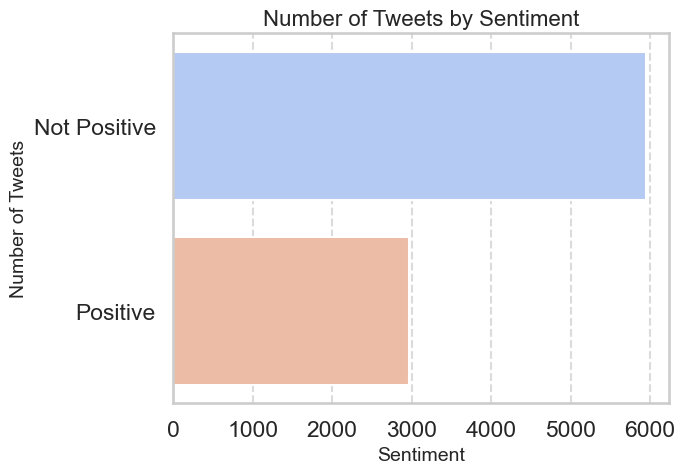

In [107]:
# Set the style and context for the plot
sns.set(style="whitegrid", context="talk")

# Create the count plot with a more appealing color palette
sent_count = sns.countplot(data=df, y='sentiment', palette='coolwarm', hue='sentiment', dodge=False, legend=False)

# Customize the plot with labels and title
sent_count.set_ylabel('Number of Tweets', fontsize=14)
sent_count.set_xlabel('Sentiment', fontsize=14)
sent_count.set_title('Number of Tweets by Sentiment', fontsize=16)

# Add grid lines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

* The significant difference in the number of tweets between “Not Positive” and “Positive” suggests an imbalance.

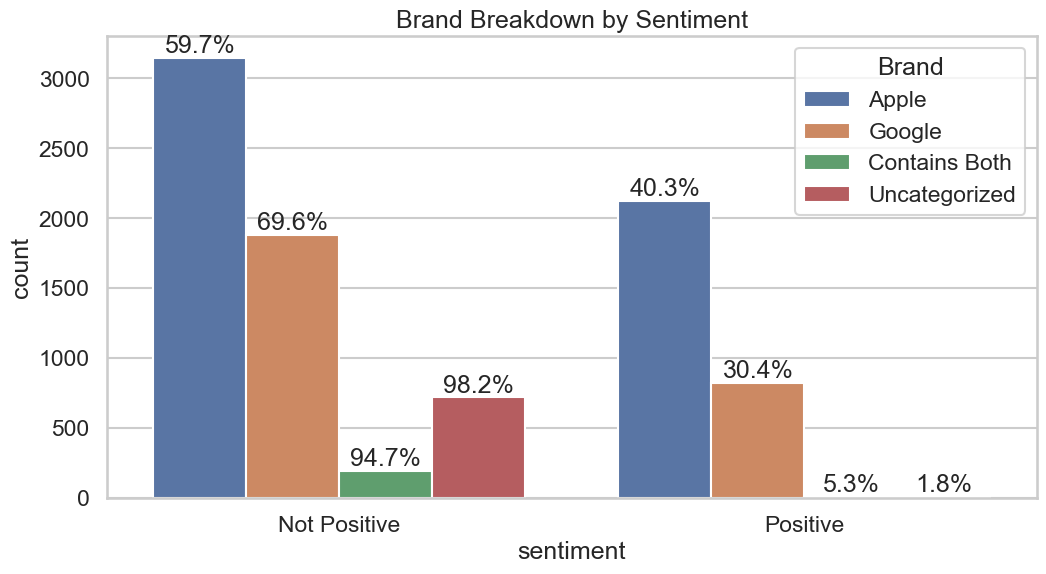

In [108]:
# Increase the plot size
plt.figure(figsize=(12, 6))  # Adjust the width and height as needed

# Create the count plot
brands_by_sent = sns.countplot(data=df, x='sentiment', hue='Brand')
brands_by_sent.set(title='Brand Breakdown by Sentiment')

# Get the total count for each brand
vc = df.Brand.value_counts().to_dict()

# Create a mapping from bar container to brand
brand_mapping = {}
for container, brand in zip(brands_by_sent.containers, df['Brand'].unique()):
    brand_mapping[container] = brand

# Extracting the percent of each brand that is in each bar and labeling bar chart
for container in brands_by_sent.containers:
    for bar in container:
        height = bar.get_height()
        brand = brand_mapping[container]  # Get the brand name
        total = vc[brand]
        percent = (height / total) * 100
        brands_by_sent.text(
            bar.get_x() + bar.get_width() / 2, 
            height, 
            f'{percent:.1f}%', 
            ha='center', 
            va='bottom'
        )

plt.show()


* Overall, not positive sentiments dominate across brands not just in count but in overall percentage of tweets which makes sense as there are about twice as many not positive tweets in the dataset

## 4.2 Brand Coverage

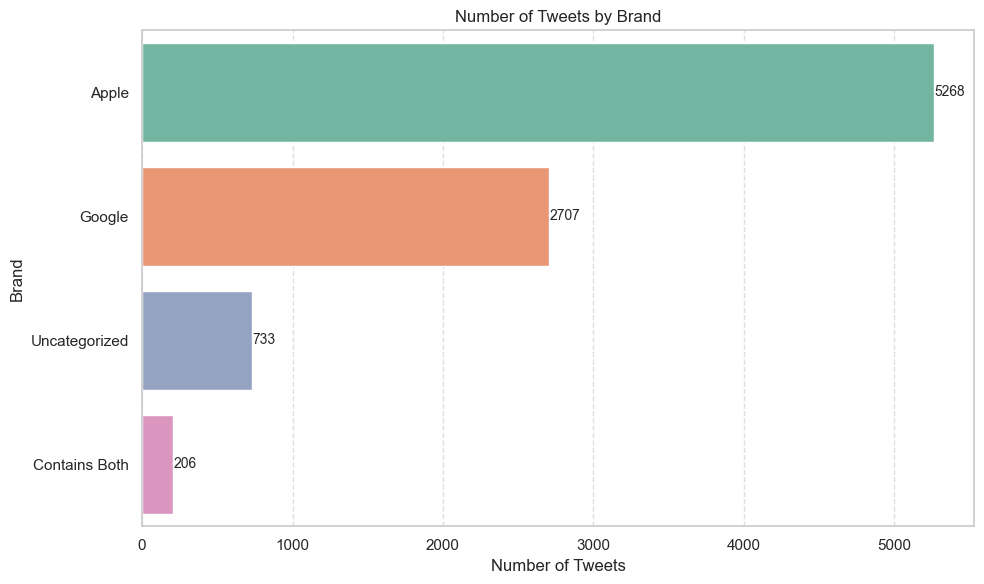

In [109]:

# Set the style
sns.set(style="whitegrid")

# Increase figure size
plt.figure(figsize=(10, 6))

# Sort the data by the number of tweets
sorted_df = df['Brand'].value_counts().reset_index()
sorted_df.columns = ['Brand', 'Count']

# Create a color palette with the same number of colors as unique brands
unique_brands = sorted_df['Brand'].nunique()
palette = sns.color_palette("Set2", unique_brands)

# Create the count plot with hue set to Brand and legend disabled
brand_count = sns.barplot(data=sorted_df, y='Brand', x='Count', palette=palette, hue='Brand', dodge=False, legend=False)
brand_count.set(ylabel='Brand', xlabel='Number of Tweets', title='Number of Tweets by Brand')

# Add data labels
for index, value in enumerate(sorted_df['Count']):
    brand_count.text(value, index, f'{value}', va='center', ha='left', fontsize=10)

# Add light gridlines
brand_count.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Show the plot
plt.tight_layout()
plt.show()


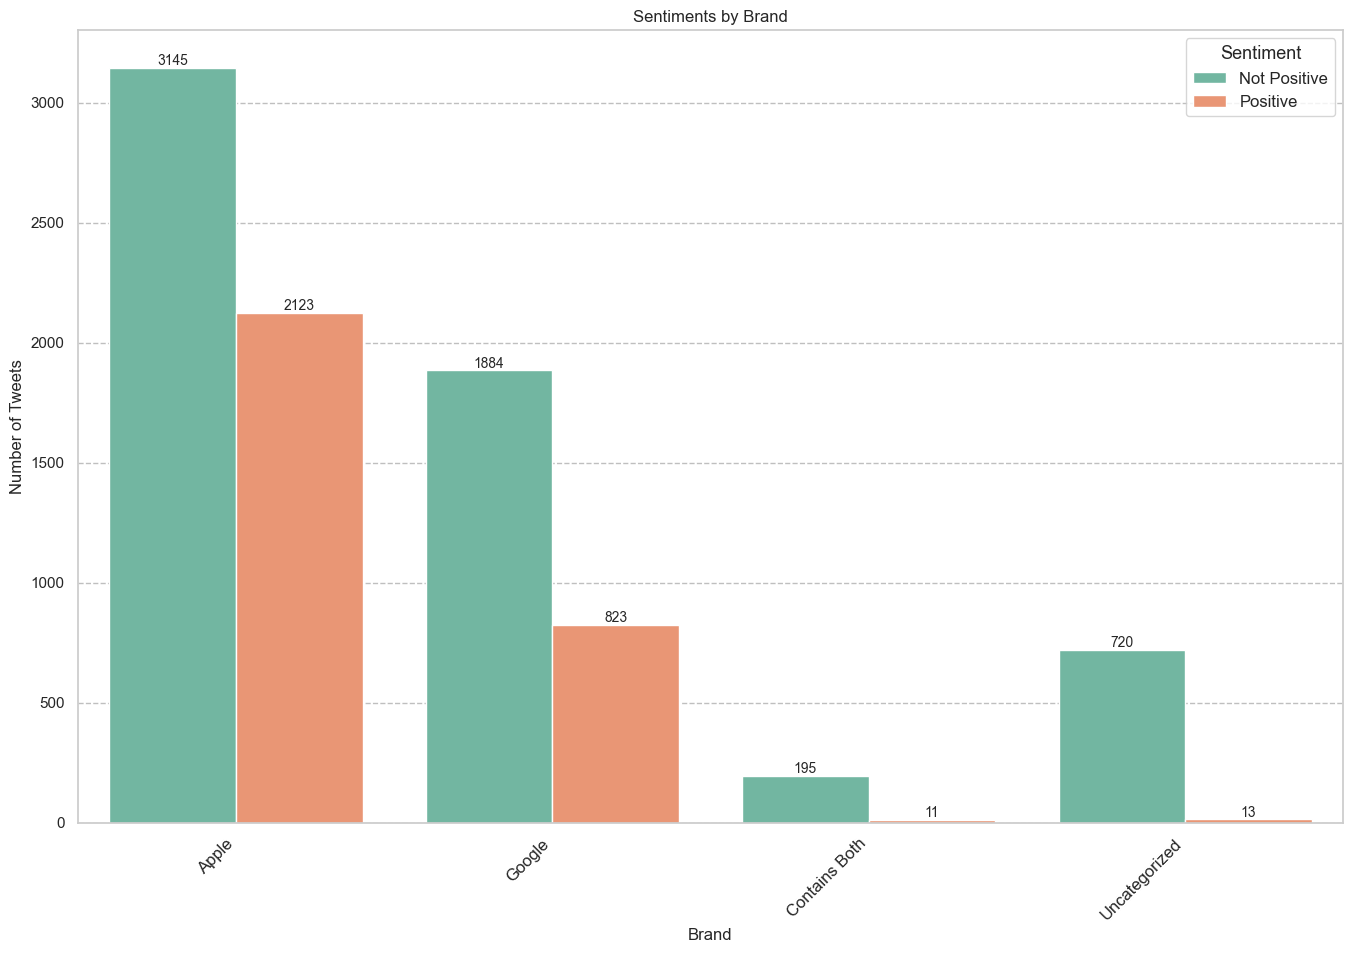

In [110]:
# Set style and increase figure size
sns.set(style="whitegrid")
plt.figure(figsize=(14, 10))

# Create count plot with dynamic palette
palette = sns.color_palette("Set2", df['sentiment'].nunique())
sent_brand_bar = sns.countplot(data=df, x='Brand', hue='sentiment', palette=palette)

# Set title, labels, and legend
sent_brand_bar.set(title='Sentiments by Brand', xlabel='Brand', ylabel='Number of Tweets')
plt.xticks(rotation=45, ha='right', fontsize=12)
sent_brand_bar.legend(title='Sentiment', loc='upper right', fontsize=12, title_fontsize='13')

# Add data labels
for container in sent_brand_bar.containers:
    sent_brand_bar.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Add light gridlines and show plot
sent_brand_bar.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.5)
plt.tight_layout(pad=2)
plt.show()


## 4.2a Analyze positive tweets for Apple products

In [111]:
# Make a dataframes for Apple's positive tweets 
Apple_Positives = df [ (df['Brand'] == 'Apple') & (df['sentiment'] == 'Positive') ]
Apple_Positives.head()

tweet  \
1   @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                               @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
8             Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB   
9                                                      Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear   
14                                                                            Great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l   

         Brand/Product sentiment  Brand              Hashtags  \
1   iPad or iPhone App  Positive  Apple               [#SXSW]   
2                 iPad  Positive  Apple        [#iPad, #SXSW]   
8   iPad or iPhone App  Positive  Apple  [#hollergram, #sxsw]   
9                Apple  Positive  Apple               [#sxsw]   
14  iPad or iPhone App  Positive  Apple               [#sxsw]   

    tweet_Word_Count  \
1                 22   
2                 15   
8                 17   
9                 16   
14                 7   

                                                                                Processed_tweet  \
1   [know, awesome, ipadiphone, app, likely, appreciate, design, also, theyre, giving, free, t]   
2                                                       [can, not, wait, 2, also, should, sale]   
8                                      [beautifully, smart, simple, idea, rt, wrote, ipad, app]   
9                     [counting, day, plus, strong, canadian, dollar, mean, stock, apple, gear]   
14                                                                           [great, ipad, app]   

   Original_Sentiment  Token Count  
1    Positive emotion           12  
2    Positive emotion            7  
8    Positive emotion            8  
9    Positive emotion           10  
14   Positive emotion            3

In [112]:
import itertools
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

class TweetAnalysis:
    def __init__(self, df, brand, sentiment_column='sentiment', processed_tweet_column='Processed_tweet'):
        self.df = df
        self.brand = brand
        self.sentiment_column = sentiment_column
        self.processed_tweet_column = processed_tweet_column

    def filter_tweets(self, sentiment):
        filtered_df = self.df[(self.df['Brand'] == self.brand) & (self.df[self.sentiment_column] == sentiment)]
        return filtered_df

    def get_top_words(self, df, top_n=20):
        all_words = list(itertools.chain(*df[self.processed_tweet_column]))
        freq = Counter(all_words)
        return freq.most_common(top_n)

    def generate_word_cloud(self, df, title):
        all_words = list(itertools.chain(*df[self.processed_tweet_column]))
        freq = Counter(all_words)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(freq)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()

    def analyze_sentiment(self, sentiment, title):
        filtered_df = self.filter_tweets(sentiment)
        top_words = self.get_top_words(filtered_df)
        
        print(f"Top 20 common words in {self.brand}'s {sentiment} tweets:")
        for word, count in top_words:
            print(f"{word}: {count}")

        self.generate_word_cloud(filtered_df, f"Word Cloud of Most Frequent Words in {self.brand}'s {sentiment} Tweets")

    def compare_wordclouds(self, positive_title, negative_title):
        positive_df = self.filter_tweets('Positive')
        negative_df = self.filter_tweets('Not Positive')
        
        positive_words = list(itertools.chain(*positive_df[self.processed_tweet_column]))
        negative_words = list(itertools.chain(*negative_df[self.processed_tweet_column]))
        
        positive_freq = Counter(positive_words)
        negative_freq = Counter(negative_words)
        
        positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_freq)
        negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_freq)
        
        # Plotting the word clouds side by side
        plt.figure(figsize=(20, 10))
        
        plt.subplot(1, 2, 1)
        plt.imshow(positive_wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(positive_title)
        
        plt.subplot(1, 2, 2)
        plt.imshow(negative_wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(negative_title)
        
        plt.show()





In [113]:
# Analyzing tweets for Apple
apple_analyzer = TweetAnalysis(df, 'Apple')

Top 20 common words in Apple's Positive tweets:
ipad: 888
apple: 692
rt: 664
store: 543
2: 470
is: 444
iphone: 425
app: 304
it: 262
austin: 225
new: 219
popup: 218
get: 139
one: 135
have: 133
line: 132
sxsw: 124
amp: 119
now: 115
are: 110


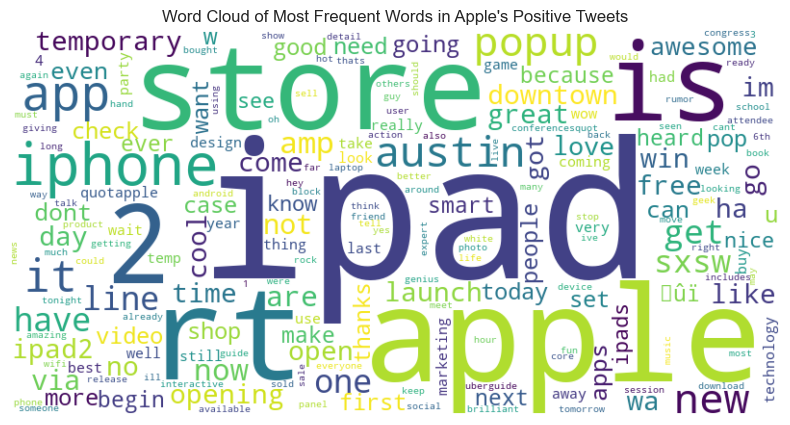

In [114]:
# Analyzing positive tweets for Apple
apple_analyzer.analyze_sentiment('Positive', "Word Cloud of Most Frequent Words in Apple's Positive Tweets")


* The word cloud analysis indicates that Apple products, particularly the iPad 2 and iPhone, are frequently mentioned in positive tweets. The iPhone app and Apple Store also appear prominently, suggesting a strong association with positive sentiment.
* The inclusion of "free" implies potential giveaways or promotions that may have contributed to the overall positive tone. The word cloud also hints at a positive reception for the new Apple Store in downtown Austin.

# 4.2b Analyze negative tweets for Apple products. Same process as for the positive tweets.

In [115]:
# Make a dataframes for Apple's positive tweets 
Apple_Negatives = df [ (df['Brand'] == 'Apple') & (df['sentiment'] == 'Not Positive') ]
Apple_Negatives.head()

tweet  \
0                .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
3                                                             @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
5   @teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd   
16                                                  Holler Gram for iPad on the iTunes App Store -  http://t.co/kfN3f5Q (via @marc_is_ken) #sxsw   
17              I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone   

         Brand/Product     sentiment  Brand  \
0               iPhone  Not Positive  Apple   
3   iPad or iPhone App  Not Positive  Apple   
5        Uncategorised  Not Positive  Apple   
16       Uncategorised  Not Positive  Apple   
17              iPhone  Not Positive  Apple   

                                         Hashtags  tweet_Word_Count  \
0                           [#RISE_Austin, #SXSW]                23   
3                                         [#sxsw]                15   
5   [#SpeechTherapy, #SXSW, #iear, #edchat, #asd]                18   
16                                        [#sxsw]                14   
17                               [#SXSW, #iPhone]                24   

                                                                                     Processed_tweet  \
0                  [have, 3g, iphone, 3, hr, tweeting, it, wa, dead, need, upgrade, plugin, station]   
3                                            [hope, year, festival, isnt, crashy, year, iphone, app]   
5                                       [new, ipad, apps, communication, are, showcased, conference]   
16                                              [holler, gram, ipad, itunes, app, store, via, isken]   
17  [noticed, dst, is, coming, weekend, many, iphone, user, hour, late, sxsw, come, sunday, morning]   

                    Original_Sentiment  Token Count  
0                     Negative emotion           13  
3                     Negative emotion            8  
5   No emotion toward brand or product            7  
16  No emotion toward brand or product            8  
17                    Negative emotion           14

Top 20 common words in Apple's Not Positive tweets:
ipad: 1192
apple: 1075
rt: 960
store: 905
iphone: 695
is: 608
2: 579
austin: 471
popup: 367
app: 283
line: 275
new: 257
amp: 238
it: 237
sxsw: 224
not: 193
have: 174
get: 174
temporary: 172
opening: 165


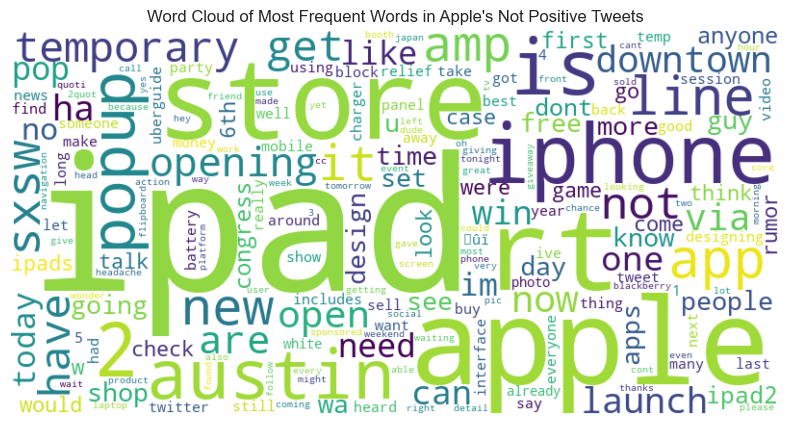

In [116]:
# Analyzing not positive tweets for Apple
apple_analyzer.analyze_sentiment('Not Positive', "Word Cloud of Most Frequent Words in Apple's Not Positive Tweets")


* Negative sentiment towards the company is primarily focused on its applications, physical stores, and customer interactions. Battery life issues are frequently cited. 
* There are complaints about long wait times at a specific store location. Additionally, the company's business practices and product design have been criticized, with terms like "fascist," "bad," and "fail" appearing in negative tweets. Some comparisons to a competitor's products are evident in the data.

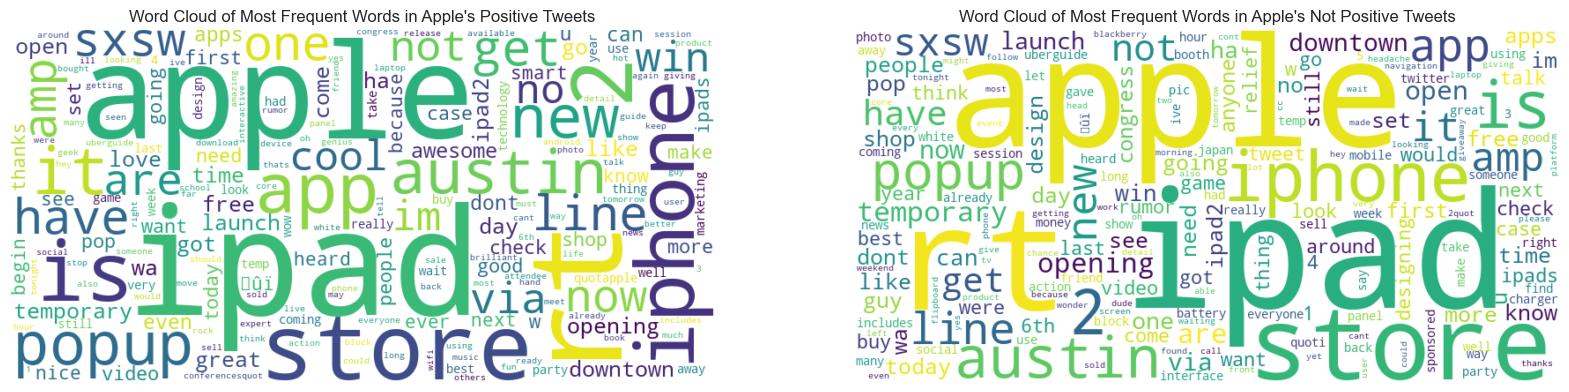

In [117]:
# Comparing word clouds for positive and not positive tweets for Apple
apple_analyzer.compare_wordclouds(
    "Word Cloud of Most Frequent Words in Apple's Positive Tweets",
    "Word Cloud of Most Frequent Words in Apple's Not Positive Tweets"
)


* The terms "app," "store," and "Austin" appear prominently in both positive and negative tweets, suggesting a potential correlation. A deeper analysis into the opening of a new Apple Store in downtown Austin around the iPad 2 launch could provide valuable insights.

* Positive sentiment is largely associated with the store opening, excitement for the iPad 2, and potential product giveaways. Conversely, negative sentiment centers around iPhone battery issues, criticisms of company practices, product design flaws, and unfavorable comparisons to a competitor.

# 4.2c Analyze positive tweets for Google products.

In [118]:
# Create its own dataframe
Google_Positives = df [ (df['Brand'] == 'Google') & (df['sentiment'] == 'Positive') ]
Google_Positives.head()

tweet  \
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   
7   #SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan   
10                      Excited to meet the @samsungmobileus at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1.   #fail   
11           Find &amp; Start Impromptu Parties at #SXSW With @HurricaneParty http://bit.ly/gVLrIn I can't wait til the Android app comes out.   
12       Foursquare ups the game, just in time for #SXSW http://j.mp/grN7pK) - Still prefer @Gowalla by far, best looking Android app to date.   

   Brand/Product sentiment   Brand                             Hashtags  \
4         Google  Positive  Google                              [#SXSW]   
7        Android  Positive  Google  [#SXSW, #CTIA, #googleio, #android]   
10       Android  Positive  Google                       [#sxsw, #fail]   
11   Android App  Positive  Google                              [#SXSW]   
12   Android App  Positive  Google                              [#SXSW]   

    tweet_Word_Count  \
4                 17   
7                 28   
10                21   
11                19   
12                22   

                                                                                                       Processed_tweet  \
4   [great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]   
7                                             [is, starting, is, around, corner, is, hop, skip, jump, good, time, fan]   
10                                             [excited, meet, can, show, sprint, galaxy, still, running, android, 21]   
11                                           [find, amp, start, impromptu, party, cant, wait, til, android, app, come]   
12                                [foursquare, ups, game, time, still, prefer, far, best, looking, android, app, date]   

   Original_Sentiment  Token Count  
4    Positive emotion           14  
7    Positive emotion           12  
10   Positive emotion           10  
11   Positive emotion           11  
12   Positive emotion           12

In [119]:
# Analyzing tweets for Google
google_analyzer = TweetAnalysis(df, 'Google')


Top 20 common words in Google's Positive tweets:
google: 613
rt: 263
is: 193
new: 137
android: 119
map: 107
party: 101
social: 100
circle: 95
launch: 86
network: 83
mobile: 70
app: 68
it: 68
mayer: 67
today: 61
marissa: 59
called: 59
amp: 56
great: 54


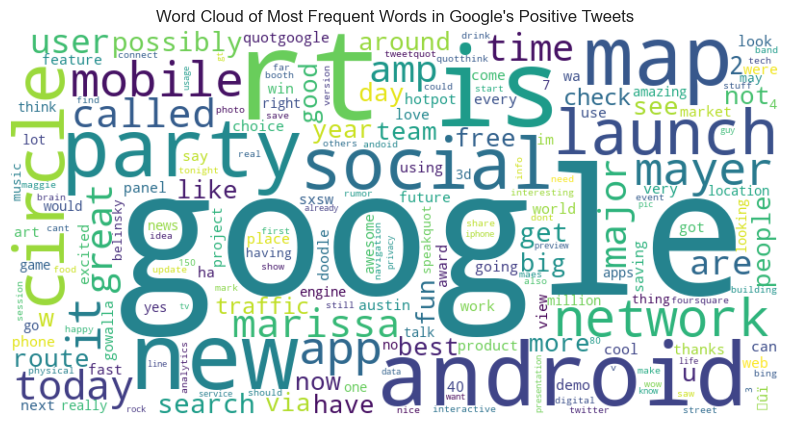

In [120]:
# Analyzing positive tweets for Google
google_analyzer.analyze_sentiment('Positive', "Word Cloud of Most Frequent Words in Google's Positive Tweets")


* Analysis of positive tweets about Google reveals a concentration on terms such as "map," "circle," "party," "launch," "social network," "new," "mobile," and the name "Marissa Mayer." This suggests a potential correlation between a social networking event and a recent product launch hosted by the company.
* Similar to findings for Apple, the city of Austin appears again, indicating potential regional focus or events. Additionally, positive sentiment is linked to the distribution of free products.

# 4.2d Analyze negative tweets for Google products.

In [121]:
# Create its own dataframe
Google_Negatives = df [ (df['Brand'] == 'Google') & (df['sentiment'] == 'Not Positive') ]
Google_Negatives.head()

tweet  \
32                      Attn: All  #SXSW frineds, @mention Register for #GDGTLive  and see Cobra iRadar for Android. {link}   
35             At #sxsw.  Oooh. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link}   
38  @mention  - False Alarm: Google Circles Not Coming NowÛÒand Probably Not Ever? - {link} #Google #Circles #Social #SXSW   
48                                 Orly....? ÛÏ@mention Google set to launch new social network #Circles today at #sxswÛ   
54    ÛÏ@mention @mention #Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxswÛ @mention   

    Brand/Product     sentiment   Brand                             Hashtags  \
32  Uncategorised  Not Positive  Google                   [#SXSW, #GDGTLive]   
35  Uncategorised  Not Positive  Google                              [#sxsw]   
38         Google  Not Positive  Google  [#Google, #Circles, #Social, #SXSW]   
48  Uncategorised  Not Positive  Google                    [#Circles, #sxsw]   
54  Uncategorised  Not Positive  Google                     [#Google, #sxsw]   

    tweet_Word_Count  \
32                15   
35                17   
38                18   
48                13   
54                16   

                                                                             Processed_tweet  \
32                                    [attn, frineds, register, see, cobra, iradar, android]   
35  [oooh, rt, google, launch, major, new, social, network, called, circle, possibly, today]   
38               [false, alarm, google, circle, not, coming, nowûòand, probably, not, ever]   
48                             [orly, ûï, google, set, launch, new, social, network, today]   
54                                     [ûï, connect, digital, amp, physical, world, mobile]   

                    Original_Sentiment  Token Count  
32  No emotion toward brand or product            7  
35  No emotion toward brand or product           12  
38                    Negative emotion           10  
48  No emotion toward brand or product            9  
54  No emotion toward brand or product            7

Top 20 common words in Google's Not Positive tweets:
google: 1476
rt: 678
social: 431
circle: 409
new: 398
network: 346
launch: 341
is: 317
today: 304
called: 261
major: 226
possibly: 187
android: 173
amp: 165
party: 140
mayer: 131
not: 130
mobile: 124
via: 122
map: 121


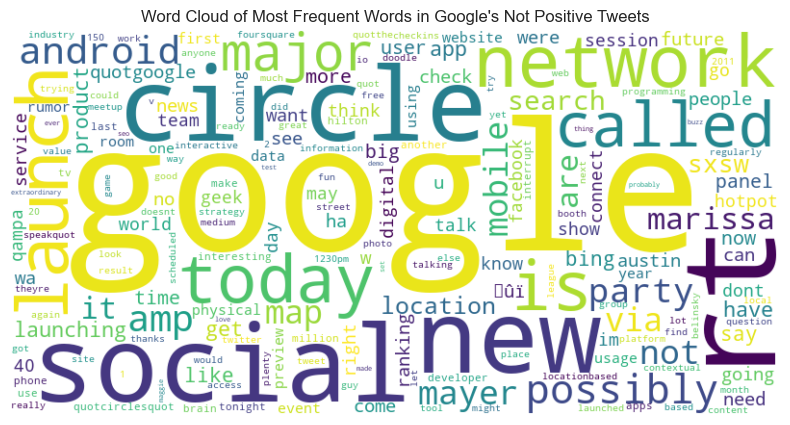

In [122]:
# Analyzing not positive tweets for Google
google_analyzer.analyze_sentiment('Not Positive', "Word Cloud of Most Frequent Words in Google's Not Positive Tweets")


* While terms like "social," "circle," "launch," "bing," and "network" appear in both positive and negative tweets, the latter group is also associated with words such as "suck," "lost," and "deadly." This suggests potential issues or controversies surrounding the launch of a social networking product, possibly involving the company's leadership, as indicated by the presence of "Marissa Mayer." 
* Additionally, there are criticisms related to the company's mapping product

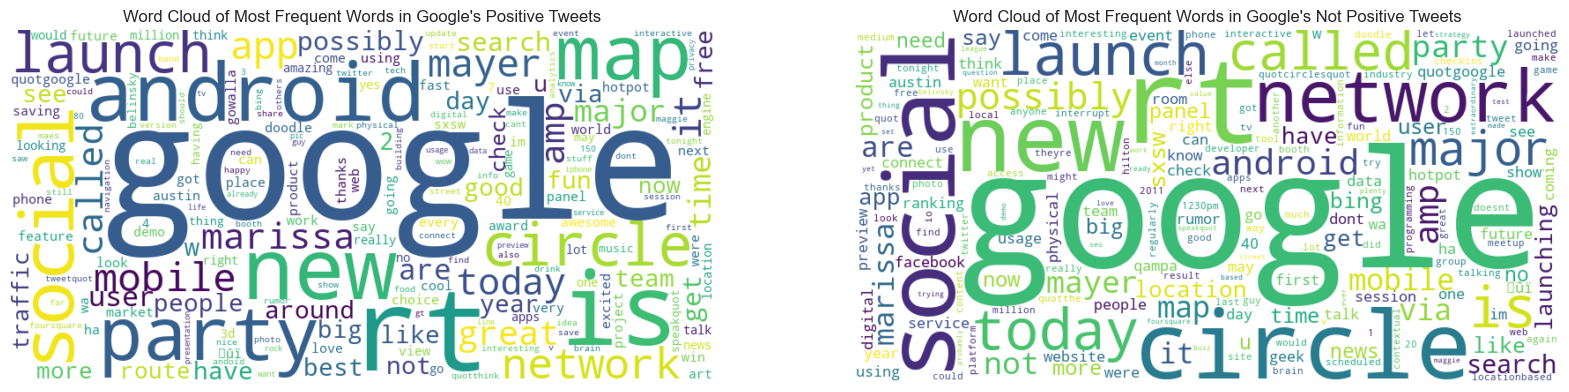

In [123]:
# Comparing word clouds for positive and not positive tweets for Google
google_analyzer.compare_wordclouds(
    "Word Cloud of Most Frequent Words in Google's Positive Tweets",
    "Word Cloud of Most Frequent Words in Google's Not Positive Tweets"
)

Looking at Google positive and negative tweets: circle pops out for both cases, social too. Words like false, alarm, wait, fail, lost occur in negative tweets more than occur in the positive tweets.

## 4.3 Brand/Product distribution

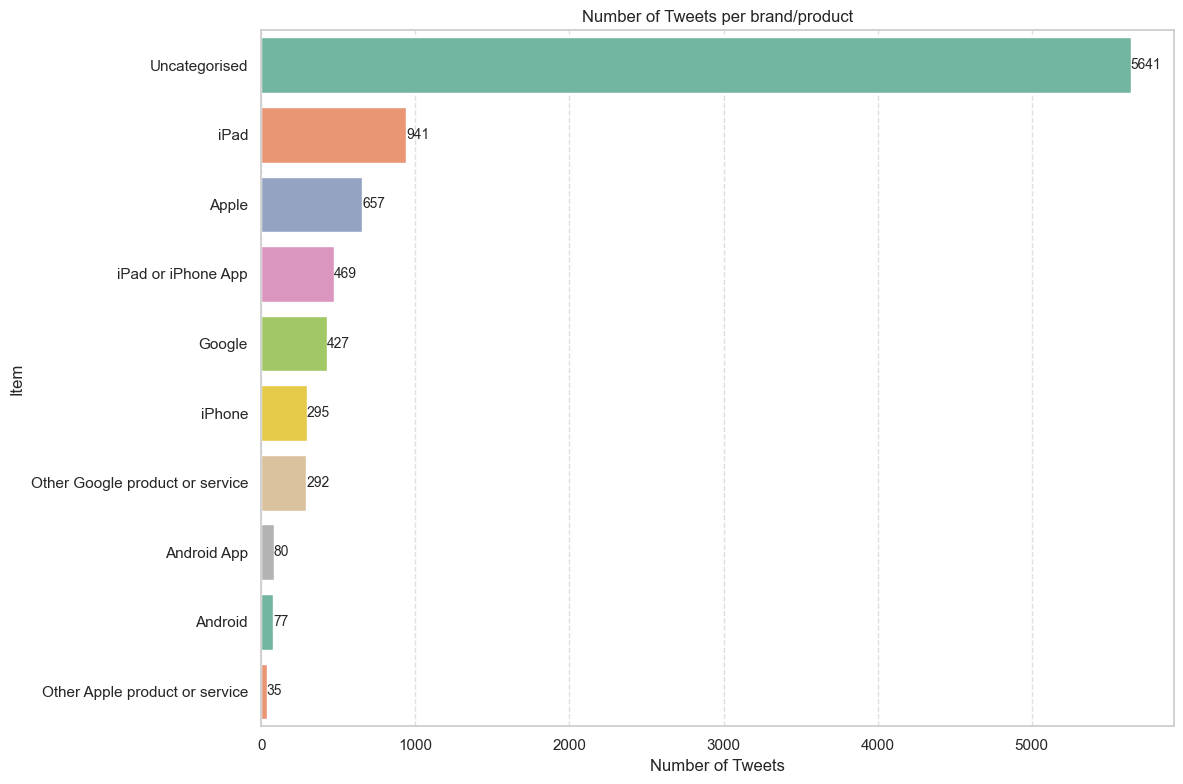

In [124]:
# Set the style
sns.set(style="whitegrid")

# Increase figure size
plt.figure(figsize=(12, 8))

# Sort the data by the number of tweets
sorted_df = df['Brand/Product'].value_counts().reset_index()
sorted_df.columns = ['Brand/Product', 'Count']

# Create the count plot with the correct number of colors in the palette
unique_items = sorted_df['Brand/Product'].nunique()
palette = sns.color_palette("Set2", unique_items)
item_count = sns.barplot(data=sorted_df, y='Brand/Product', x='Count', palette=palette, hue='Brand/Product', dodge=False, legend=False)

# Set title and labels
item_count.set(ylabel='Item', xlabel='Number of Tweets', title='Number of Tweets per brand/product')

# Add data labels
for index, value in enumerate(sorted_df['Count']):
    item_count.text(value, index, f'{value}', va='center', ha='left', fontsize=10)

# Add light gridlines
item_count.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Show the plot
plt.tight_layout()
plt.show()


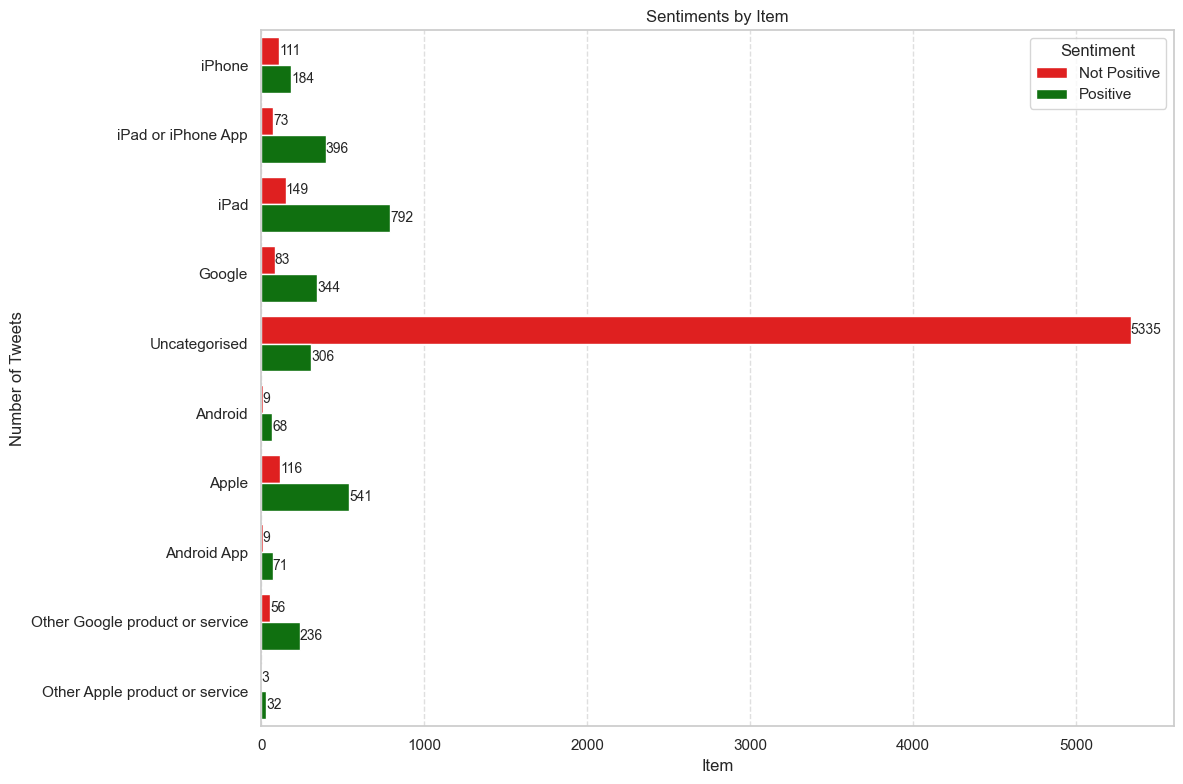

In [125]:
# Set the style and increase figure size
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))

# Create the count plot
sent_item_bar = sns.countplot(data=df, y='Brand/Product', hue='sentiment', palette=['red', 'green'])

# Set title and labels
sent_item_bar.set(ylabel='Number of Tweets', xlabel='Item', title='Sentiments by Item')

# Add legend with title
sent_item_bar.legend(title='Sentiment', loc='upper right')

# Add data labels
for container in sent_item_bar.containers:
    sent_item_bar.bar_label(container, fmt='%d', label_type='edge', fontsize=10)

# Add light gridlines
sent_item_bar.xaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Show the plot
plt.tight_layout()
plt.show()

* The item with the highest number of positive sentiments is “iPad,” followed closely by “Apple.”
* It can be seen that all brand/products except the uncategorized have many more positive tweets than negative.

# 4.3a Now, let's look into Apple products since we decided to focus on Apple products, and iPad shows up a lot in both the positive and negative tweets.

In [126]:
# filtering the dataset by only looking into ipad, iPad, iPad or iPhone App
df_iPad = df [ (df['Brand/Product'] == 'ipad') | (df['Brand/Product'] == 'iPad') | (df['Brand/Product'] == 'iPad or iPhone App')]
df_iPad.head(10)

tweet  \
1   @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                               @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                            @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
8             Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.ly/ieaVOB   
14                                                                            Great #sxsw ipad app from @madebymany: http://tinyurl.com/4nqv92l   
15                                                           haha, awesomely rad iPad app by @madebymany http://bit.ly/hTdFim #hollergram #sxsw   
18               Just added my #SXSW flights to @planely. Matching people on planes/airports. Also downloaded the @KLM iPhone app, nicely done.   
19                       Must have #SXSW app! RT @malbonster: Lovely review from Forbes for our SXSW iPad app Holler Gram - http://t.co/g4GZypV   
20                                   Need to buy an iPad2 while I'm in Austin at #sxsw. Not sure if I'll need to Q up at an Austin Apple store?   
21              Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!   

         Brand/Product     sentiment  Brand              Hashtags  \
1   iPad or iPhone App      Positive  Apple               [#SXSW]   
2                 iPad      Positive  Apple        [#iPad, #SXSW]   
3   iPad or iPhone App  Not Positive  Apple               [#sxsw]   
8   iPad or iPhone App      Positive  Apple  [#hollergram, #sxsw]   
14  iPad or iPhone App      Positive  Apple               [#sxsw]   
15  iPad or iPhone App      Positive  Apple  [#hollergram, #sxsw]   
18  iPad or iPhone App      Positive  Apple               [#SXSW]   
19  iPad or iPhone App      Positive  Apple               [#SXSW]   
20                iPad      Positive  Apple               [#sxsw]   
21  iPad or iPhone App      Positive  Apple               [#SXSW]   

    tweet_Word_Count  \
1                 22   
2                 15   
3                 15   
8                 17   
14                 7   
15                10   
18                19   
19                19   
20                24   
21                23   

                                                                                   Processed_tweet  \
1      [know, awesome, ipadiphone, app, likely, appreciate, design, also, theyre, giving, free, t]   
2                                                          [can, not, wait, 2, also, should, sale]   
3                                          [hope, year, festival, isnt, crashy, year, iphone, app]   
8                                         [beautifully, smart, simple, idea, rt, wrote, ipad, app]   
14                                                                              [great, ipad, app]   
15                                                               [haha, awesomely, rad, ipad, app]   
18  [added, flight, matching, people, planesairports, also, downloaded, iphone, app, nicely, done]   
19                    [must, have, app, rt, lovely, review, forbes, sxsw, ipad, app, holler, gram]   
20                   [need, buy, ipad2, im, austin, not, sure, ill, need, q, austin, apple, store]   
21    [oh, god, app, ipad, is, pure, unadulterated, awesome, easier, browse, event, ipad, website]   

   Original_Sentiment  Token Count  
1    Positive emotion           12  
2    Positive emotion            7  
3    Negative emotion            8  
8    Positive emotion            8  
14   Positive emotion            3  
15   Positive emotion            5  
18   Positive emotion           11  
19   Positive emotion           12  
20   Positive emotion           13  
21

In [127]:
# Focus on the positive tweets on iPad
df_iPad_positive = df_iPad[ df_iPad['sentiment'] == 'Positive' ]

In [128]:
from nltk.probability import FreqDist
# Combine all processed tweets into a single list
all_words = [word for tweet in df_iPad_positive['Processed_tweet'] for word in tweet]

# Calculate the frequency distribution of the words
freq = FreqDist(all_words)

# Get the top 60 most common words
top_60_words = freq.most_common(60)

# Create a dictionary for the word cloud
word_freq_dict = dict(top_60_words)
word_freq_dict

{'ipad': 738,
 '2': 373,
 'rt': 332,
 'app': 276,
 'is': 243,
 'iphone': 209,
 'store': 196,
 'apple': 180,
 'new': 163,
 'it': 120,
 'austin': 92,
 'get': 87,
 'have': 86,
 'now': 75,
 'line': 67,
 'popup': 66,
 'one': 65,
 'amp': 62,
 'im': 58,
 'sxsw': 57,
 'are': 57,
 'time': 57,
 'not': 56,
 'ha': 56,
 'apps': 55,
 'awesome': 52,
 'ipad2': 52,
 'free': 50,
 'win': 50,
 'like': 47,
 'video': 47,
 'wa': 45,
 'want': 45,
 'day': 45,
 'great': 44,
 'via': 44,
 'check': 43,
 'today': 41,
 'first': 40,
 'got': 40,
 'need': 39,
 'go': 37,
 'can': 36,
 'good': 34,
 'going': 33,
 'launch': 32,
 'people': 30,
 'more': 30,
 'really': 29,
 'look': 29,
 'cool': 29,
 'take': 29,
 'design': 28,
 'game': 27,
 'w': 27,
 'u': 26,
 'live': 26,
 'download': 26,
 'buy': 25,
 'make': 25}

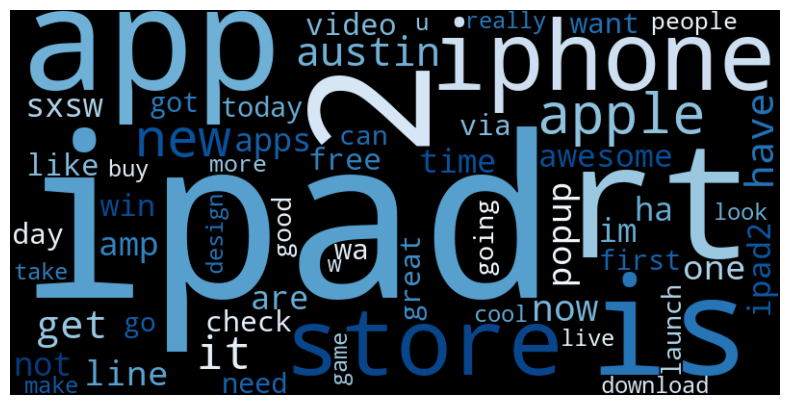

In [129]:
# Visualize them with WordCloud
wordcloud = WordCloud(width=800, height=400, colormap='Blues', collocations=True).generate_from_frequencies(word_freq_dict)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

* Positive sentiment surrounding the iPad 2 is linked to consumer satisfaction with promotional giveaways and enthusiasm generated by the opening of a new retail location in Austin coinciding with the product launch.

# 4.3b Look at what's in the negative tweets about iPad

In [130]:
# Create its own dataframe
df_iPad_negative = df_iPad[ df_iPad['sentiment'] == 'Not Positive' ]
df_iPad_negative.head()

tweet  \
3                                                       @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
67                                                                                   attending @mention iPad design headaches #sxsw {link}   
170         Seriously #sxsw? Did you do any testing on the mobile apps? Constant iPad crashes causing lost schedules, and no sync for WP7.   
172                                                                               ipad2 and #sxsw...a conflagration of doofusness.  {link}   
180  You spent $1,000+ to come to SXSW. \n\nYou've already used iPad 1. \n\nThe wait is a couple city blocks. \n\nWhy? #ipad2 #SXSW {link}   

          Brand/Product     sentiment  Brand         Hashtags  \
3    iPad or iPhone App  Not Positive  Apple          [#sxsw]   
67                 iPad  Not Positive  Apple          [#sxsw]   
170  iPad or iPhone App  Not Positive  Apple          [#sxsw]   
172                iPad  Not Positive  Apple          [#sxsw]   
180                iPad  Not Positive  Apple  [#ipad2, #SXSW]   

     tweet_Word_Count  \
3                  15   
67                  7   
170                22   
172                 7   
180                23   

                                                                                            Processed_tweet  \
3                                                   [hope, year, festival, isnt, crashy, year, iphone, app]   
67                                                                      [attending, ipad, design, headache]   
170  [seriously, did, testing, mobile, apps, constant, ipad, crash, causing, lost, schedule, no, sync, wp7]   
172                                                                      [ipad2, conflagration, doofusness]   
180                        [spent, 1000, come, sxsw, already, used, ipad, 1, wait, is, couple, city, block]   

    Original_Sentiment  Token Count  
3     Negative emotion            8  
67    Negative emotion            4  
170   Negative emotion           14  
172   Negative emotion            3  
180   Negative emotion           13

In [131]:
# Focus on the positive tweets on iPad
df_iPad_negative = df_iPad[ df_iPad['sentiment'] == 'Not Positive' ]


In [132]:
# Combine all processed tweets into a single list
all_words_negative = [word for tweet in df_iPad_negative['Processed_tweet'] for word in tweet]

# Calculate the frequency distribution of the words
freq_negative = FreqDist(all_words_negative)

# Get the top 60 most common words
top_60_words_negative = freq_negative.most_common(60)

# Create a dictionary for the word cloud
word_freq_dict_negative = dict(top_60_words_negative)
word_freq_dict_negative

{'ipad': 159,
 '2': 55,
 'rt': 53,
 'is': 50,
 'app': 43,
 'iphone': 42,
 'not': 38,
 'it': 31,
 'design': 26,
 'new': 25,
 'apps': 22,
 'have': 22,
 'like': 19,
 'no': 16,
 'headache': 15,
 'get': 15,
 'need': 13,
 'news': 13,
 'dont': 13,
 'look': 13,
 'year': 12,
 'sxsw': 12,
 'money': 12,
 'now': 12,
 'can': 12,
 'im': 11,
 'people': 11,
 'fast': 11,
 'thing': 11,
 'ive': 11,
 'ha': 11,
 'take': 11,
 'are': 10,
 'fade': 10,
 'see': 10,
 'amp': 9,
 'think': 9,
 'one': 9,
 'call': 9,
 'via': 9,
 'day': 9,
 'novelty': 9,
 'among': 9,
 'delegate': 9,
 'button': 9,
 'someone': 9,
 'cant': 8,
 'best': 8,
 'quoti': 8,
 'gave': 8,
 'content': 8,
 'really': 8,
 'tablet': 8,
 'digital': 8,
 'store': 8,
 'hate': 8,
 'line': 8,
 'wait': 7,
 'say': 7,
 'heard': 7}

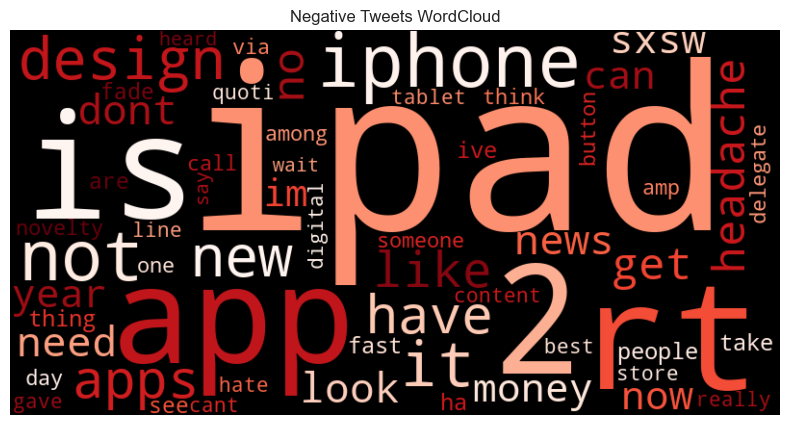

In [133]:
# Visualize them with WordCloud
wordcloud_negative = WordCloud(width=800, height=400, colormap='Reds', collocations=True).generate_from_frequencies(word_freq_dict_negative)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets WordCloud')
plt.show()

* Negative tweets on iPad seems focus on the design

#  4.3c let's move on to iPhone tweets analysis:

In [134]:
# Create its own dataframe
df_iPhone = df [ (df['Brand/Product'] == 'iPhone') | (df['Brand/Product'] == 'iphone') ]
df_iPhone.head()

tweet  \
0    .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
17  I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone   
76                                                I love my @mention iPhone case from #Sxsw but I can't get my phone out of it #fail   
92                        What !?!? @mention  #SXSW does not provide iPhone chargers?!?  I've changed my mind about going next year!   
96        Yai!!! RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by (cont) {link}   

   Brand/Product     sentiment  Brand                       Hashtags  \
0         iPhone  Not Positive  Apple          [#RISE_Austin, #SXSW]   
17        iPhone  Not Positive  Apple               [#SXSW, #iPhone]   
76        iPhone      Positive  Apple                 [#Sxsw, #fail]   
92        iPhone  Not Positive  Apple                        [#SXSW]   
96        iPhone      Positive  Apple  [#UberSocial, #iPhone, #SXSW]   

    tweet_Word_Count  \
0                 23   
17                24   
76                18   
92                17   
96                20   

                                                                                     Processed_tweet  \
0                  [have, 3g, iphone, 3, hr, tweeting, it, wa, dead, need, upgrade, plugin, station]   
17  [noticed, dst, is, coming, weekend, many, iphone, user, hour, late, sxsw, come, sunday, morning]   
76                                                        [love, iphone, case, cant, get, phone, it]   
92                            [not, provide, iphone, charger, ive, changed, mind, going, next, year]   
96                             [yai, rt, new, now, app, store, includes, uberguide, sponsored, cont]   

   Original_Sentiment  Token Count  
0    Negative emotion           13  
17   Negative emotion           14  
76   Positive emotion            7  
92   Negative emotion           10  
96   Positive emotion           10

In [135]:
# Create a dataframe for iPhone positive tweets
df_iPhone_positive = df_iPhone[ df_iPhone['sentiment'] == 'Positive' ]

In [136]:
df_iPhone_positive.head()

tweet  \
76                                                               I love my @mention iPhone case from #Sxsw but I can't get my phone out of it #fail   
96                       Yai!!! RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by (cont) {link}   
135                        Take that #SXSW ! RT @mention Major South Korean director gets $130,000 to make a movie entirely with his iPhone. {link}   
182                                                           Behind on 100s of emails? Give them all 1 line iPhone composed replies. #SXSW #protip   
214  Picked up a Mophie battery case 4 my iPhone in prep for #SXSW. Not lugging around a laptop &amp; only using my phone was a huge win last year.   

    Brand/Product sentiment  Brand                       Hashtags  \
76         iPhone  Positive  Apple                 [#Sxsw, #fail]   
96         iPhone  Positive  Apple  [#UberSocial, #iPhone, #SXSW]   
135        iPhone  Positive  Apple                        [#SXSW]   
182        iPhone  Positive  Apple               [#SXSW, #protip]   
214        iPhone  Positive  Apple                        [#SXSW]   

     tweet_Word_Count  \
76                 18   
96                 20   
135                21   
182                15   
214                29   

                                                                                                                  Processed_tweet  \
76                                                                                     [love, iphone, case, cant, get, phone, it]   
96                                                          [yai, rt, new, now, app, store, includes, uberguide, sponsored, cont]   
135                                        [take, rt, major, south, korean, director, get, 130000, make, movie, entirely, iphone]   
182                                                                  [behind, 100, email, give, 1, line, iphone, composed, reply]   
214  [picked, mophie, battery, case, 4, iphone, prep, not, lugging, around, laptop, amp, using, phone, wa, huge, win, last, year]   

    Original_Sentiment  Token Count  
76    Positive emotion            7  
96    Positive emotion           10  
135   Positive emotion           12  
182   Positive emotion            9  
214   Positive emotion           19

In [137]:
# Combine all processed tweets into a single list
all_words_iPhone_positive = [word for tweet in df_iPhone_positive['Processed_tweet'] for word in tweet]

# Calculate the frequency distribution of the words
freq_iPhone_positive = FreqDist(all_words_iPhone_positive)

# Get the top 60 most common words
top_60_words_iPhone_positive = freq_iPhone_positive.most_common(60)

# Create a dictionary for the word cloud
word_freq_dict_iPhone_positive = dict(top_60_words_iPhone_positive)
word_freq_dict_iPhone_positive

{'iphone': 164,
 'rt': 51,
 'is': 33,
 'it': 20,
 'have': 20,
 'are': 17,
 'ipad': 16,
 '4': 15,
 'got': 14,
 'new': 13,
 'im': 13,
 'case': 12,
 'love': 11,
 'phone': 11,
 'make': 11,
 'get': 10,
 'amp': 10,
 'wa': 10,
 'now': 9,
 'one': 9,
 'can': 9,
 'next': 9,
 'w': 9,
 'free': 9,
 'year': 8,
 'more': 8,
 'charger': 8,
 'like': 8,
 'give': 7,
 'battery': 7,
 'not': 7,
 'thanks': 7,
 'charging': 7,
 'juice': 7,
 'android': 7,
 'u': 7,
 'via': 7,
 'tell': 7,
 'use': 7,
 'ready': 7,
 'wow': 6,
 'best': 6,
 'thing': 6,
 'charge': 6,
 'bar': 6,
 'well': 6,
 'going': 6,
 'austin': 6,
 'much': 6,
 'awesome': 6,
 'laptop': 5,
 'using': 5,
 'last': 5,
 'work': 5,
 'hand': 5,
 '\x89ûï': 5,
 'thank': 5,
 'thats': 5,
 'platform': 5,
 'back': 5}

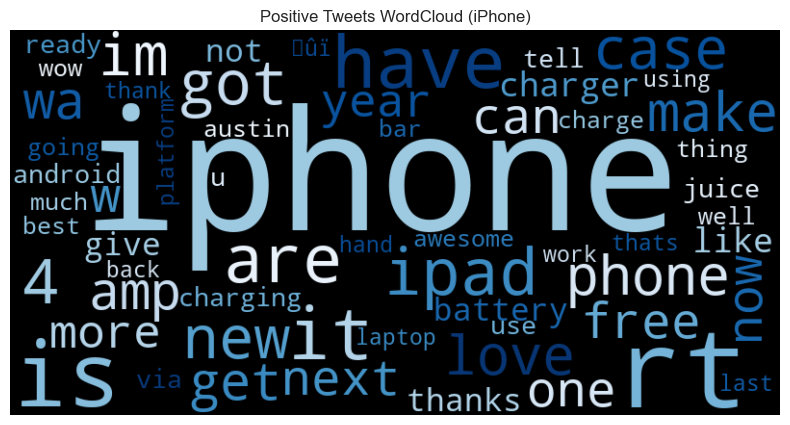

In [138]:
# Visualize them with WordCloud
wordcloud_iPhone_positive = WordCloud(width=800, height=400, colormap='Blues', collocations=True).generate_from_frequencies(word_freq_dict_iPhone_positive)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_iPhone_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Positive Tweets WordCloud (iPhone)')
plt.show()

* Positive sentiment towards the iPhone is associated with product accessories and promotional giveaways.

# 4.3d Analyze iPhone negative tweets

In [139]:
# Create a dataframe for negative tweets for iPhone
df_iPhone_negative = df_iPhone[ df_iPhone['sentiment'] == 'Not Positive' ]


In [140]:
# Combine all processed tweets into a single list
all_words_iPhone_negative = [word for tweet in df_iPhone_negative['Processed_tweet'] for word in tweet]

# Calculate the frequency distribution of the words
freq_iPhone_negative = FreqDist(all_words_iPhone_negative)

# Get the top 60 most common words
top_60_words_iPhone_negative = freq_iPhone_negative.most_common(60)

# Create a dictionary for the word cloud
word_freq_dict_iPhone_negative = dict(top_60_words_iPhone_negative)
word_freq_dict_iPhone_negative

{'iphone': 102,
 'is': 36,
 'it': 17,
 'battery': 16,
 'rt': 16,
 'have': 12,
 'not': 12,
 'austin': 9,
 'because': 9,
 'time': 9,
 'go': 9,
 'blackberry': 7,
 'app': 7,
 'no': 7,
 'wa': 6,
 'going': 6,
 'already': 6,
 'like': 6,
 'life': 6,
 'ha': 6,
 'phone': 6,
 'need': 5,
 'user': 5,
 'are': 5,
 'people': 5,
 'know': 5,
 'ipad': 5,
 'one': 5,
 'would': 5,
 'u': 5,
 'good': 5,
 'technology': 5,
 'working': 5,
 'get': 5,
 '3g': 4,
 'many': 4,
 'hour': 4,
 'apple': 4,
 'can': 4,
 '4': 4,
 'think': 4,
 'now': 4,
 'iphones': 4,
 'tmobile': 4,
 'atampt': 4,
 'store': 4,
 'charge': 4,
 'last': 4,
 'long': 4,
 'say': 4,
 'made': 4,
 'always': 4,
 'new': 4,
 'im': 4,
 'anything': 4,
 'amp': 4,
 'forward': 4,
 'tweeting': 3,
 'dead': 3,
 'sxsw': 3}

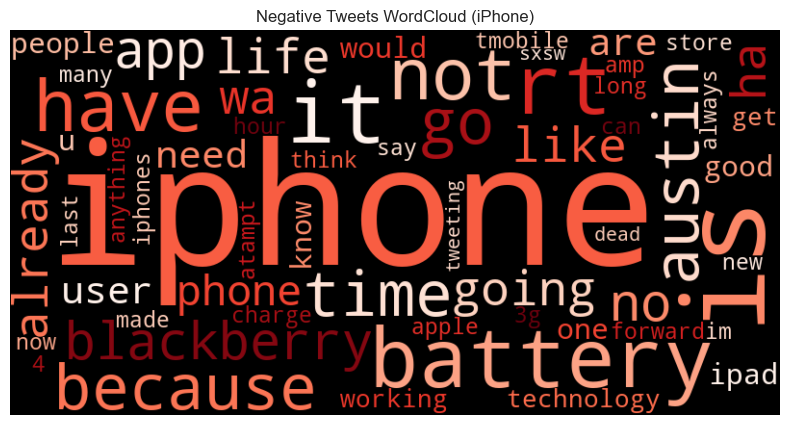

In [141]:
# Visualize them with WordCloud
wordcloud_iPhone_negative = WordCloud(width=800, height=400, colormap='Reds', collocations=True).generate_from_frequencies(word_freq_dict_iPhone_negative)

# Plot the WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_iPhone_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Negative Tweets WordCloud (iPhone)')
plt.show()

* Analysis of negative tweets about the iPhone indicates that battery life is the primary customer complaint. Additionally, comparisons to a competing smartphone brand are evident in the data.

## 4.4 Tweet word count/ Token Count by Sentiment

<Figure size 1200x800 with 0 Axes>

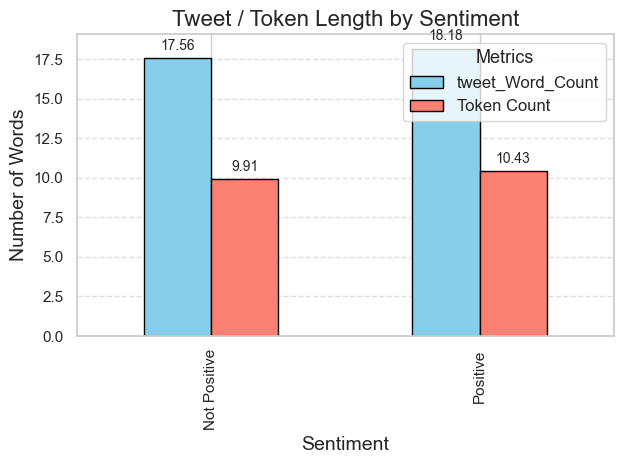

In [142]:
# Set the style
sns.set(style="whitegrid")

# Increase figure size
plt.figure(figsize=(12, 8))

# Group by sentiment and calculate mean
mean_counts = df.groupby('sentiment')[['tweet_Word_Count', 'Token Count']].mean()

# Create the bar plot
tweet_token_sent_bar = mean_counts.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')

# Set title and labels
tweet_token_sent_bar.set_title('Tweet / Token Length by Sentiment', fontsize=16)
tweet_token_sent_bar.set_ylabel('Number of Words', fontsize=14)
tweet_token_sent_bar.set_xlabel('Sentiment', fontsize=14)

# Customize the legend
tweet_token_sent_bar.legend(title='Metrics', title_fontsize='13', fontsize='12')

# Add data labels
for p in tweet_token_sent_bar.patches:
    tweet_token_sent_bar.annotate(format(p.get_height(), '.2f'), 
                                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                                  ha = 'center', va = 'center', 
                                  xytext = (0, 9), 
                                  textcoords = 'offset points',
                                  fontsize=10)

# Add light gridlines
tweet_token_sent_bar.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=.25)

# Show the plot
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Number of Words')

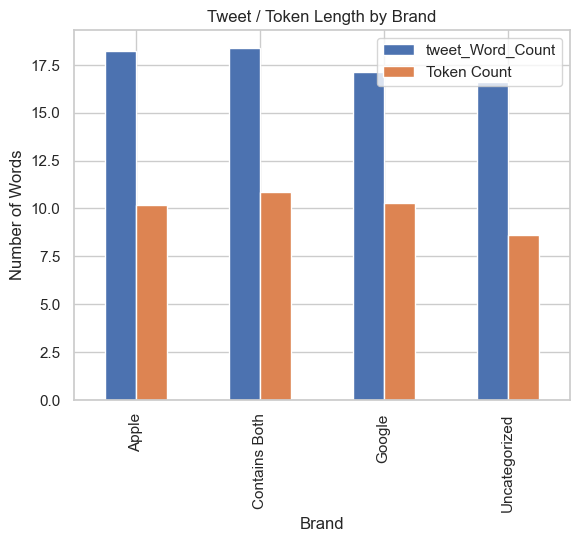

In [143]:
#Tweet/ Token Count by brand bar
tweet_token_brand_bar = df.groupby(['Brand'])[['tweet_Word_Count','Token Count']].mean().plot.bar()
tweet_token_brand_bar.set_title('Tweet / Token Length by Brand')
tweet_token_brand_bar.set_ylabel('Number of Words')

* Initial analysis does not reveal clear, actionable trends.

# 4.5 Hashtag Exploration

Hashtags, commonly used to categorize tweets, will be the focus of the next analysis. Before examining these tags, they must be extracted and broken down into individual words or phrases, a process known as tokenization.

In [144]:
#Creating a list of Hashtags from the hashtag column
hashtags_list = df['Hashtags'].to_list()

#Converting list to bag of words separating via commas
hashtag_bag = ','.join(map(str, hashtags_list))
#Converting Bag of words into tokens
hashtag_tokens = word_tokenize(hashtag_bag)
#Reformatting tokens in lowercase
hashtag_tokens = [x.lower() for x in hashtag_tokens]
hashtag_tokens[:10]

['[', "'", '#', 'rise_austin', "'", ',', "'", '#', 'sxsw', "'"]

In [145]:
#Defining punctuation as stopwords
hashtag_stopwords = list(string.punctuation)
#Removing punctuation from list of hashtag tokens
hashtag_tokens_clean = [token for token in hashtag_tokens if token not in hashtag_stopwords]

hashtag_freq = nltk.FreqDist(hashtag_tokens_clean)
hashtag_freq.most_common(10)

[('sxsw', 8941),
 ('apple', 413),
 ('google', 319),
 ('sxswi', 313),
 ('ipad2', 294),
 ('iphone', 263),
 ('ipad', 260),
 ('android', 130),
 ('austin', 110),
 ('circles', 97)]

In [146]:

def generate_hashtag_visuals(df, sentiment_label):
    """
    This function takes a DataFrame with 'Sentiment' and 'Hashtags' columns and a sentiment label as input.
    It generates a list of hashtags for the specified sentiment, tokenizes and cleans the hashtags, 
    and then visualizes the top hashtags using a word cloud and a bar graph.
    
    Parameters:
    df (DataFrame): The input DataFrame containing 'Sentiment' and 'Hashtags' columns.
    sentiment_label (str): The sentiment label to filter the DataFrame by.
    """
    
    # Filter the DataFrame by the specified sentiment
    filtered_df = df[df['sentiment'] == sentiment_label]
    
    # Extract the list of hashtags
    hashtags = filtered_df['Hashtags'].tolist()
    
    # Convert the list of hashtags into a single string
    hashtags_str = ','.join(map(str, hashtags))
    
    # Tokenize the string of hashtags
    tokens = word_tokenize(hashtags_str)
    
    # Convert tokens to lowercase
    tokens = [token.lower() for token in tokens]
    
    # Define punctuation as stopwords
    punctuation = list(string.punctuation)
    
    # Remove punctuation from the list of tokens
    clean_tokens = [token for token in tokens if token not in punctuation]
    
    # Create a frequency distribution of the tokens
    freq_dist = nltk.FreqDist(clean_tokens)
    
    # Print the top 15 tokens
    print(f'Top 15 Hashtags for {sentiment_label} are:', freq_dist.most_common(15))
    
    # Convert the frequency distribution to a pandas Series for plotting
    freq_series = pd.Series(dict(freq_dist.most_common(8)))
    
    # Plot the top 8 tokens as a bar graph
    plt.figure(figsize=(10, 6))
    sns.barplot(x=freq_series.values, y=freq_series.index, palette='viridis', hue=freq_series.index, dodge=False, legend=False)
    plt.title(f'Top 8 Most Common Hashtags for {sentiment_label} Tweets')
    plt.xlabel('Hashtag Count')
    plt.ylabel('Hashtags')
    plt.show()
    
    # Generate a word cloud for the top 40 tokens
    wordcloud = WordCloud(max_words=40, collocations=False, background_color='black', colormap='prism')
    wordcloud.generate(','.join(clean_tokens))
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud of {sentiment_label} Hashtags')
    plt.show()




Top 15 Hashtags for Positive are: [('sxsw', 2990), ('apple', 177), ('ipad2', 130), ('sxswi', 96), ('ipad', 93), ('iphone', 82), ('google', 69), ('android', 42), ('austin', 40), ('tech', 28), ('hollergram', 23), ('ubersocial', 21), ('tapworthy', 21), ('winning', 19), ('circles', 17)]


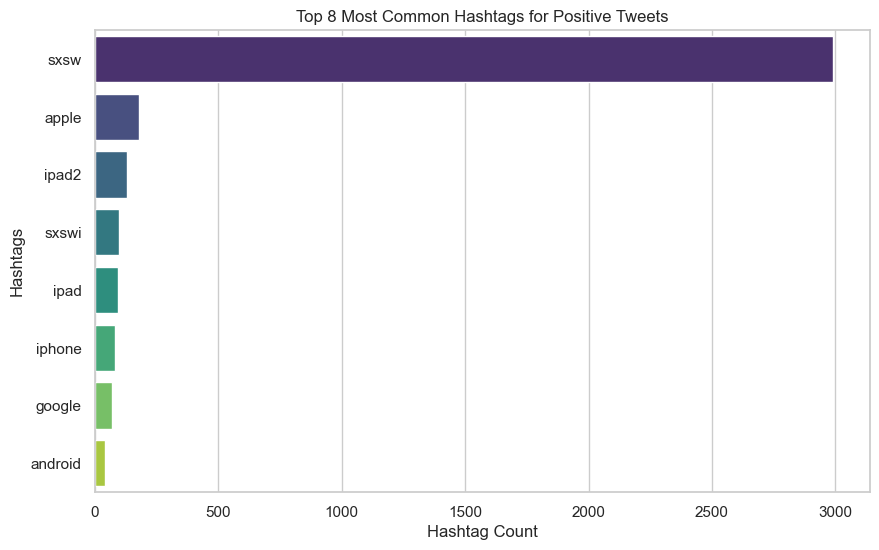

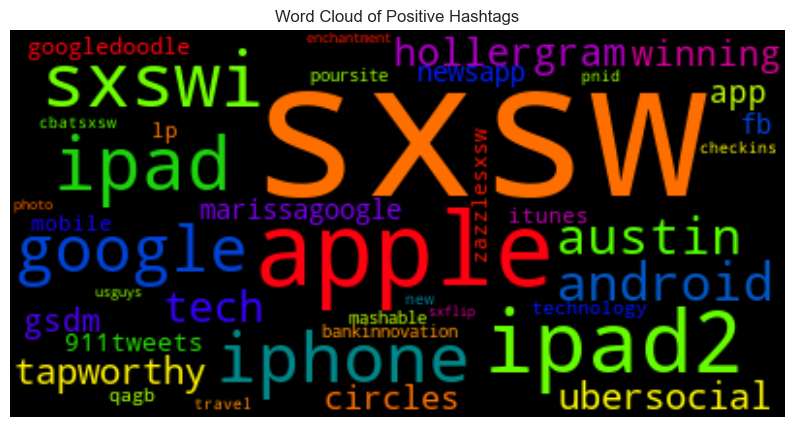

In [147]:
#Positive Sentiment Hashtags Analysis
generate_hashtag_visuals(df, 'Positive')

Top 15 Hashtags for Not Positive are: [('sxsw', 5951), ('google', 250), ('apple', 236), ('sxswi', 217), ('iphone', 181), ('ipad', 167), ('ipad2', 164), ('android', 88), ('circles', 80), ('austin', 70), ('tech', 59), ('japan', 51), ('ubersocial', 47), ('gsdm', 47), ('infektd', 46)]


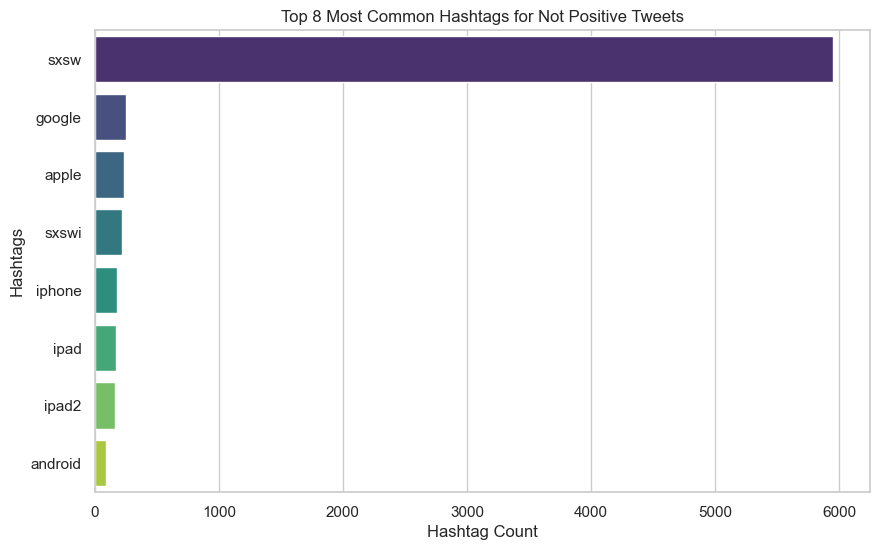

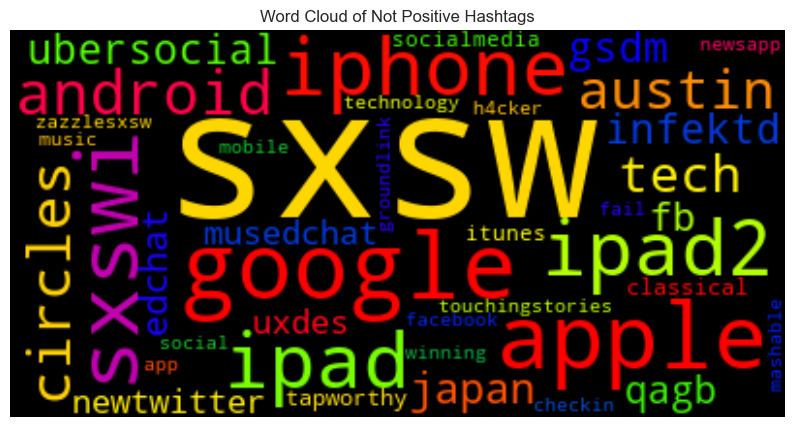

In [148]:
#Not Positive Sentiment Hashtags Analysis

generate_hashtag_visuals(df, 'Not Positive')

* Preliminary analysis indicates that hashtag frequency is consistent across different sentiment categories. Consequently, hashtags are deemed unlikely to be effective predictors of sentiment.


In [149]:
df.head()

tweet  \
0              .@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.   
1  @jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW   
2                                                              @swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.   
3                                                           @sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw   
4          @sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)   

        Brand/Product     sentiment   Brand               Hashtags  \
0              iPhone  Not Positive   Apple  [#RISE_Austin, #SXSW]   
1  iPad or iPhone App      Positive   Apple                [#SXSW]   
2                iPad      Positive   Apple         [#iPad, #SXSW]   
3  iPad or iPhone App  Not Positive   Apple                [#sxsw]   
4              Google      Positive  Google                [#SXSW]   

   tweet_Word_Count  \
0                23   
1                22   
2                15   
3                15   
4                17   

                                                                                                      Processed_tweet  \
0                                   [have, 3g, iphone, 3, hr, tweeting, it, wa, dead, need, upgrade, plugin, station]   
1                         [know, awesome, ipadiphone, app, likely, appreciate, design, also, theyre, giving, free, t]   
2                                                                             [can, not, wait, 2, also, should, sale]   
3                                                             [hope, year, festival, isnt, crashy, year, iphone, app]   
4  [great, stuff, fri, marissa, mayer, google, tim, oreilly, tech, booksconferences, amp, matt, mullenweg, wordpress]   

  Original_Sentiment  Token Count  
0   Negative emotion           13  
1   Positive emotion           12  
2   Positive emotion            7  
3   Negative emotion            8  
4   Positive emotion           14

In [150]:
# Save DataFrame to CSV file
df.to_csv('EDA_tweet_dataset.csv', index=False)
